# 0. Introduction

In this notebook, I will go through my solution and analysis of the [Kaggle Titanic survival prediction competition](https://www.kaggle.com/c/titanic/overview). The aim of this competition is simple, given what we know about a passenger aboard the Titanic, can we predict whether or not this passenger has survived? In other words, we want to train a machine learning model to learn the relationship between passenger features and their survival outcome and subsequently make survival predictions on passenger data that our model has not seen before.

This is a classic beginner's project suited for anyone who is looking to gain some hands-on experience with data science and machine learning. I hope you will find some value out of this notebook.

I drew inspirations from the following notebooks in the making of this notebook:
- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions) by [Manav Sehgal](https://www.kaggle.com/startupsci)
- [Titanic Top 4% With Emsemble Modelling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling) by [Yassin Ghouzam](https://www.kaggle.com/yassineghouzam)
    
Kaggle competitions comprise of a minimum of 3 datasets that you can find and download from the competition webpage. The three datasets are:

1. Training set
2. Test set 
3. Sample submission

## Training set
This is the dataset that you will be working on predominantly. You will perform manipulation and analysis on this dataset to extract insights as well as build a predictive model. The goal here is to determine and create features that will help us predict the outcome of our data. There are two types of problems in machine learning and they are classfication and regression problems. Titanic is an example of a classification problem where the outcome is categorical. In other words, our model needs to be able to predict and classify outcomes as either one of two categories, survived or did not survive the titanic.

## Test set
Once our model has been built, we need to make sure that it does not merely fit our training set well but also able to make predictions on out-of-samples data, that is data our model has not been trained on. We will use the testing set as inputs to the model that we have built and make predictions based on those inputs. This is where you will be assessed in the competition i.e. how accurate is your model at predicting new observations. It is also important to note that every competition has different metrics in which they assess model accuracy and you can find this information under the evaluation tab in the overview section of the competition page. For this competition, the evaluation metric is simply the percentage of passengers that are correctly predicted by our model.

## Sample submission
This is the format in which you want to submit your final solution. Pay attention to the column headings and shape of the sample submission to get a better understanding on how you should structure your final dataframe for submission.

# 1. Import libraries

Here I will import the libraries that I will be using in my notebook. Libraries are essentially extensions to Python that consist of functions that are handy to have when we are performing our analysis. 

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

Now import and read the 3 datasets as outlined in the introduction.

In [2]:
train = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/train.csv")
test = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/test.csv")
ss = pd.read_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/gender_submission.csv")

Let's have a look at the datasets.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


Note that the test set has one column less than training set, the Survived column. This is because Survived is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict the survival of the passengers in the test set.

What about sample submission?

In [6]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
ss.shape

(418, 2)

So, our final dataframe that is to be submitted should look something like this, 418 rows and 2 columns, one for PassengerId and one for Survived.

# 3. Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the [data](https://www.kaggle.com/c/titanic/data) tab of the competition page.

- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

# 4. Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

## 4.1 Data types, missing data and summary statistics

In [8]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Seems like Age, Cabin and Embarked colummns in the training set have missing data  while Age, Fare and Cabin in the test set have missing data. Another way to to diagnose this is via the missingno library.

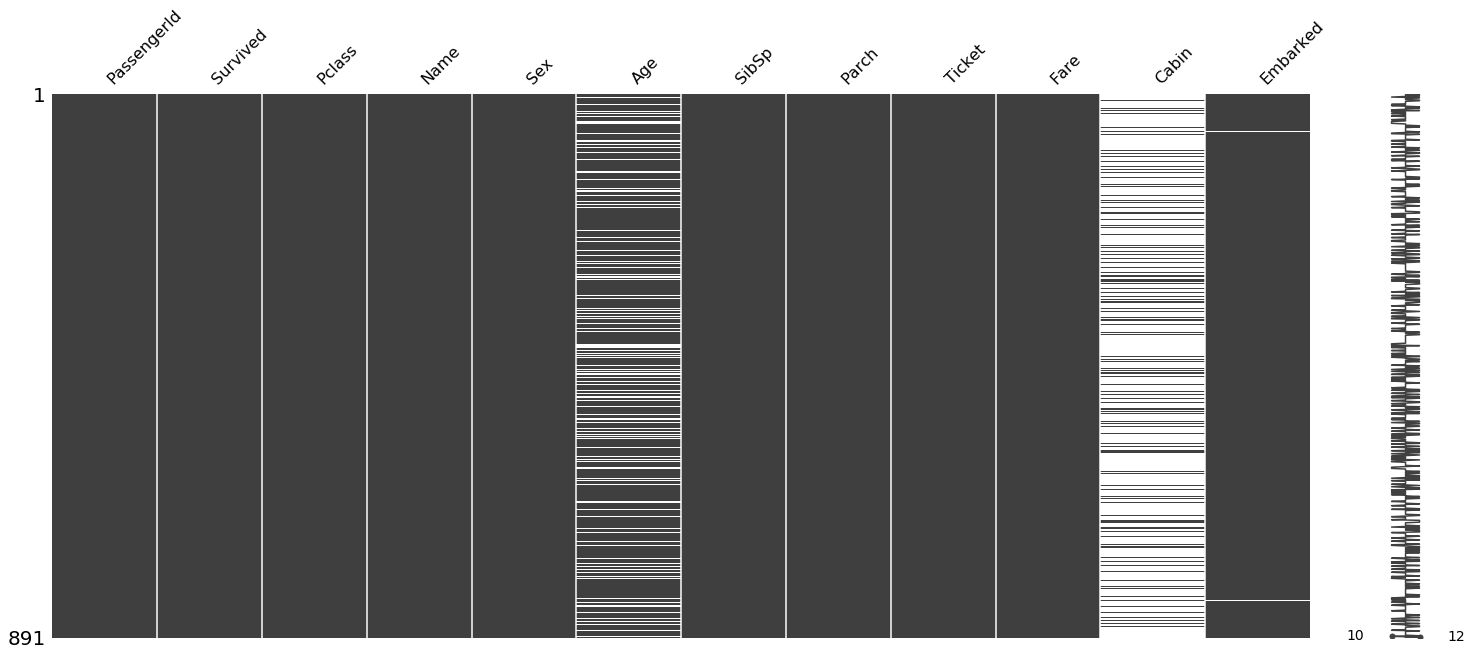

In [11]:
# Missing data in training set

missingno.matrix(train)

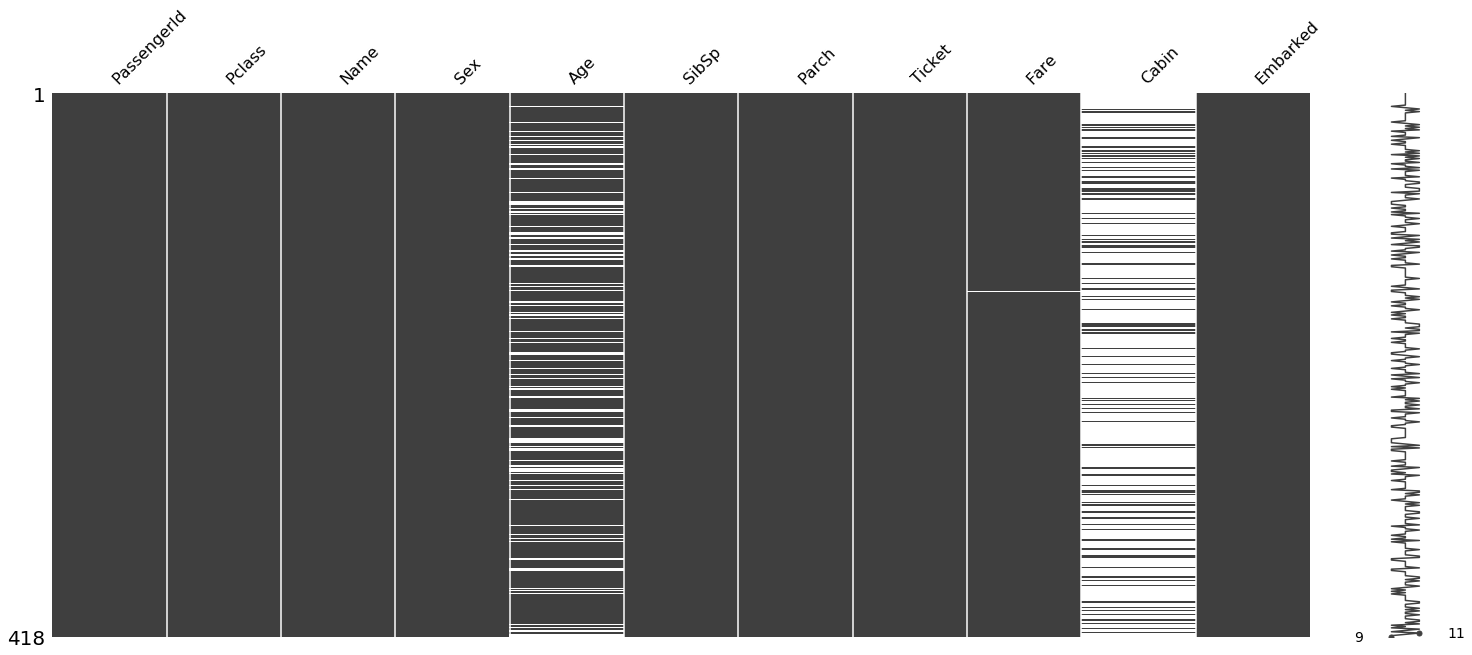

In [12]:
# Missing data in test set 

missingno.matrix(test)

In [13]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.2 Feature analysis

A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations. In our dataset, rows are the passengers on the titanic whereas columns are the features that describe the passengers like their age, gender etc.

Before we move on, it is also important to note the difference between a categorical variable and a numerical variable. Categorical variables, as the name suggests, have values belonging to one of two or more categories and there is usually no intrinsic ordering to these categories. An example of this in our data is the Sex feature. Every passenger is distinctly classified as either male or female. Numerical variables, on the other hand, have a continuous distribution. Some examples of numerical variables are the Age and Fare features.

Knowing if a feature is a numerical variable or categorical variable helps us structure our analysis more properly. For instance, it doesn't make sense to calculate the average of a categorical variable such as gender simply because gender is a binary classification and therefore has no intrinsic ordering to its values.

In this next section of the notebook, we will analyse the features in our dataset individually and see how they correlate with survival probability.

## 4.2.1 Categorical variables

Categorical variables in our dataset are Sex, Pclass and Embarked.

## Categorical variable: Sex

In [15]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

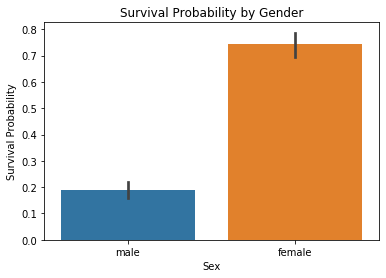

In [17]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

## Categorical variable: Pclass

In [18]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

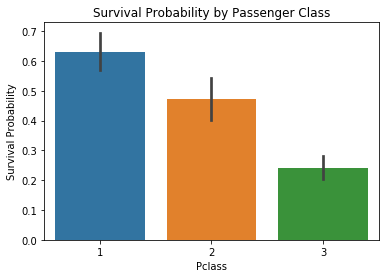

In [20]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1, 'Survival Probability by Sex and Passenger Class')

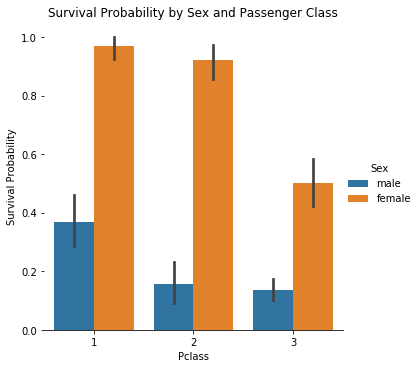

In [21]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

## Categorical variable: Embarked

In [22]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [23]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

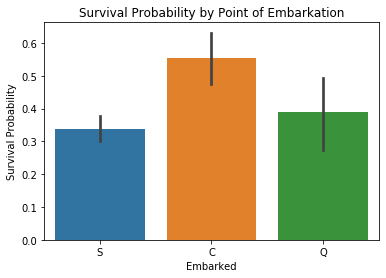

In [24]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

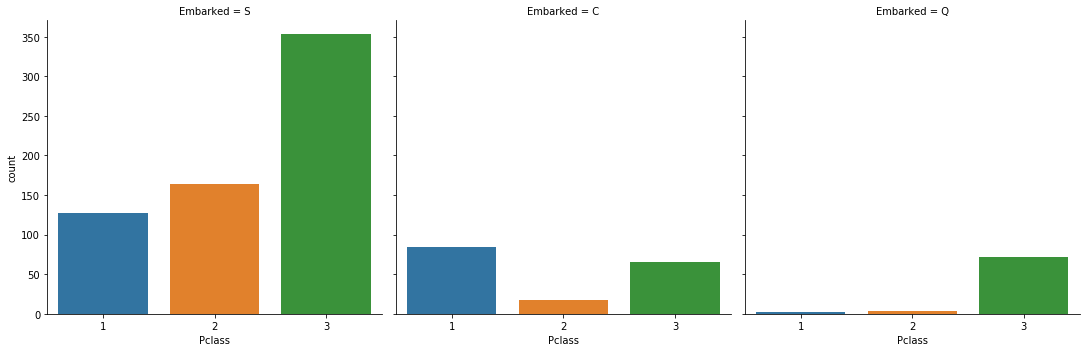

In [25]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers. 

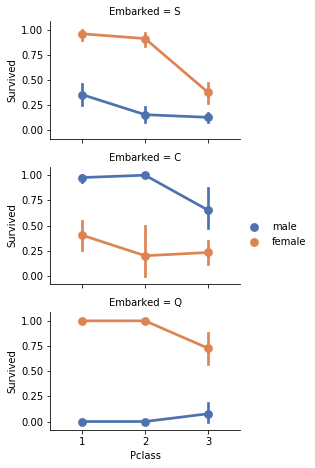

In [26]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

## 4.2.2 Numerical variables

Numerical variables in our dataset are SibSp, Parch, Age and Fare.

## Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

In [27]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [28]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [29]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


## Numerical variables correlation with survival

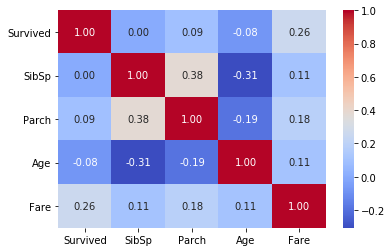

In [30]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

## Numerical variable: SibSp

In [31]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [32]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

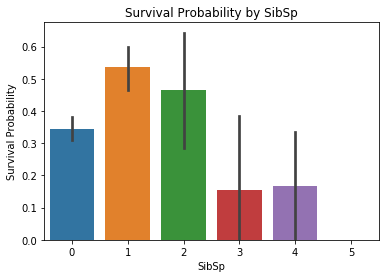

In [33]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Numerical variable: Parch

In [34]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

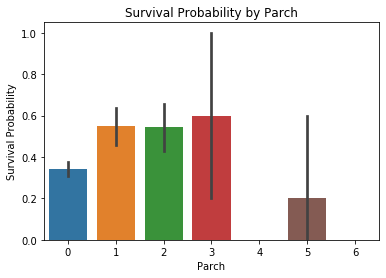

In [36]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

## Numerical variable: Age

In [37]:
# Null values in Age column 

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

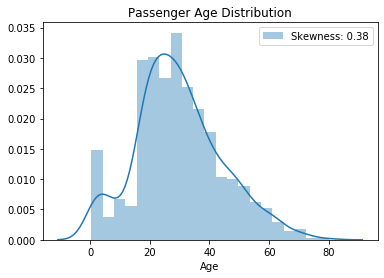

In [38]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

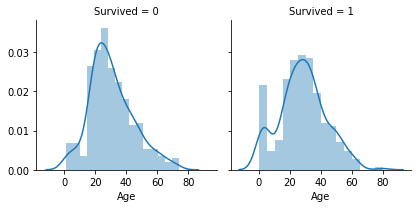

In [39]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

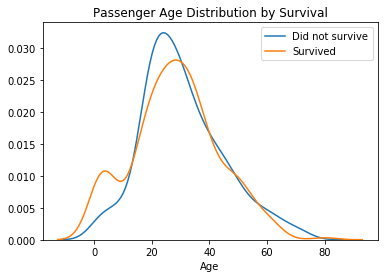

In [40]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

## Numerical variable: Fare

In [41]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

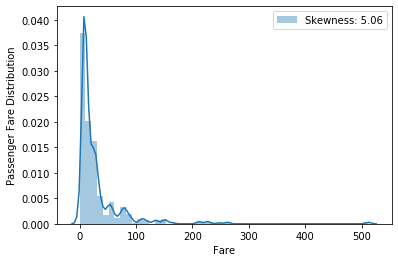

In [42]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

Fare seems to have a high skewness. We will address this issue later on in the notebook via log transformation. 

# 5. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

## 5.1 Drop and fill missing values

In [43]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

I have decided to drop both ticket and cabin for simplicity of this tutorial but if you have the time, I would recommend going through them and see if they can help improve your model.

In [44]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [45]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [46]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [47]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Name            0
Pclass          0
PassengerId     0
dtype: int64

In [48]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [49]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [50]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [51]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding and we will further explore this later in the notebook.

In [52]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

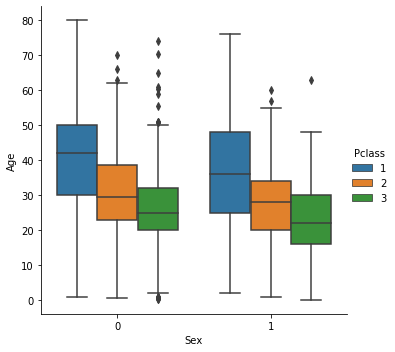

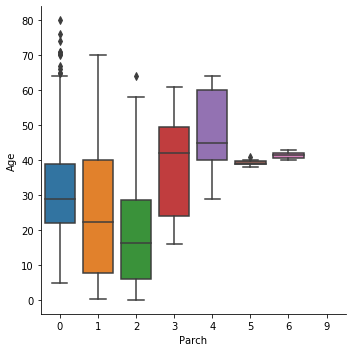

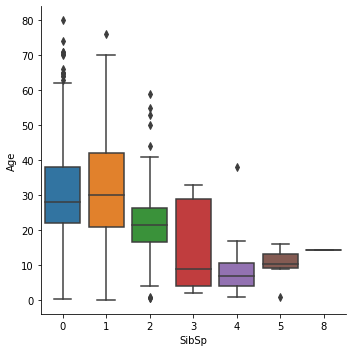

In [53]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

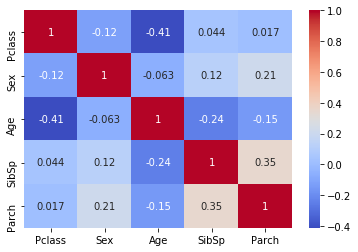

In [54]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass. 

In [55]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.

In [56]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [57]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

## 5.2 Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

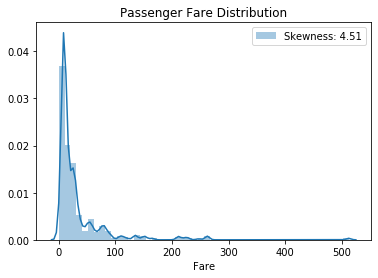

In [58]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [59]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

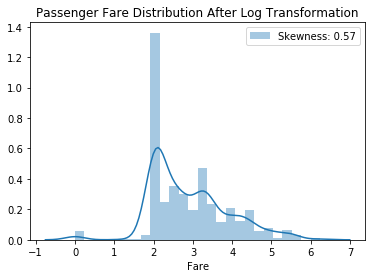

In [60]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## 5.3 Feature engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:
- Title
- IsAlone
- Age*Class

## 5.3.1 Title

In [61]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [62]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [63]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
Sir               1
Lady              1
Don               1
Jonkheer          1
Dona              1
the Countess      1
Mme               1
Name: Title, dtype: int64

In [64]:
# Number of unique Title

combine['Title'].nunique()

18

In [65]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

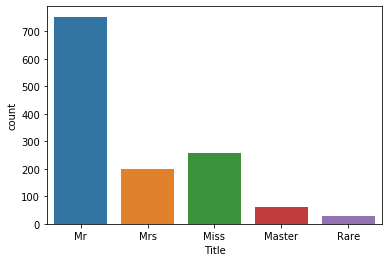

In [66]:
sns.countplot(combine['Title'])

In [67]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1, 'Mean of survival by Title')

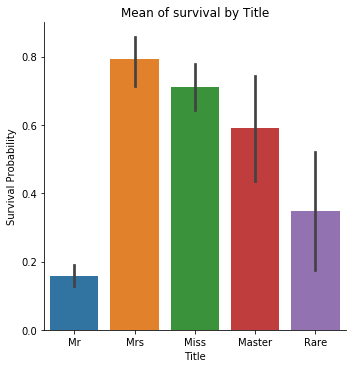

In [68]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [69]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


## 5.3.2 IsAlone

In [70]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [71]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [72]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [73]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [74]:
# Drop SibSp, Parch and FamilySize featurs from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


## 5.3.3 Age*Class

To create our new Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values. 

We will group Ages into 5 separate age bands and assign a number to each age band.

In [75]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [76]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [77]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [78]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [79]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [80]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## 5.4 Feature encoding 

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the data to our models.

Previously, we have encoded the sex column such that 0 = female and 1 = male. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [81]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [82]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [83]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [84]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [85]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [86]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [87]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [88]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [89]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [90]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [91]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [92]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [93]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


Our dataframes are ready for modelling!

# 6. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project. 

Since titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our data and make predictions. I highly recommend checking out this scikit-learn [documentation](https://scikit-learn.org/stable/index.html) for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost

In this section of the notebook, I will fit the training set to the models outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 6.1 Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [94]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


## 6.2 Fit model to data and make predictions

This requires 3 simple steps: instantiate the model, fit the training data to the training set, predict the test set. 

## 6.2.1 Logistic regression

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

## 6.2.2 Support vector machines

In [96]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

## 6.2.3 K-nearest neighbours (KNN)

In [97]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.79

## 6.2.4 Gaussian naive bayes

In [98]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

## 6.2.5 Perceptron

In [99]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

## 6.2.6 Linear SVC

In [100]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

## 6.2.7 Stochastic gradient descent

In [101]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.25

## 6.2.8 Decision tree

In [102]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

## 6.2.9 Random forest

In [103]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

## 6.2.10 CatBoost

In [104]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6871228	total: 248ms	remaining: 4m 8s
1:	learn: 0.6801574	total: 252ms	remaining: 2m 5s
2:	learn: 0.6732637	total: 258ms	remaining: 1m 25s
3:	learn: 0.6672910	total: 262ms	remaining: 1m 5s
4:	learn: 0.6611084	total: 266ms	remaining: 52.8s
5:	learn: 0.6555569	total: 270ms	remaining: 44.8s
6:	learn: 0.6501811	total: 274ms	remaining: 38.9s
7:	learn: 0.6441823	total: 278ms	remaining: 34.5s
8:	learn: 0.6402135	total: 282ms	remaining: 31s
9:	learn: 0.6349168	total: 285ms	remaining: 28.3s
10:	learn: 0.6297361	total: 289ms	remaining: 26s
11:	learn: 0.6258520	total: 293ms	remaining: 24.2s
12:	learn: 0.6202912	total: 298ms	remaining: 22.6s
13:	learn: 0.6160007	total: 301ms	remaining: 21.2s
14:	learn: 0.6109708	total: 305ms	remaining: 20.1s
15:	learn: 0.6057145	total: 310ms	remaining: 19.1s
16:	learn: 0.6022326	total: 313ms	remaining: 18.1s
17:	learn: 0.5977868	total: 318ms	remaining: 17.3s
18:	learn: 0.5930687	total: 323ms	remaining: 16.7s
19:	learn: 0.58

176:	learn: 0.3886259	total: 996ms	remaining: 4.63s
177:	learn: 0.3883281	total: 1s	remaining: 4.62s
178:	learn: 0.3880114	total: 1s	remaining: 4.61s
179:	learn: 0.3878231	total: 1.01s	remaining: 4.59s
180:	learn: 0.3876306	total: 1.01s	remaining: 4.58s
181:	learn: 0.3872532	total: 1.02s	remaining: 4.57s
182:	learn: 0.3869712	total: 1.02s	remaining: 4.56s
183:	learn: 0.3866999	total: 1.02s	remaining: 4.55s
184:	learn: 0.3864887	total: 1.03s	remaining: 4.53s
185:	learn: 0.3864666	total: 1.03s	remaining: 4.52s
186:	learn: 0.3861676	total: 1.04s	remaining: 4.51s
187:	learn: 0.3859786	total: 1.04s	remaining: 4.5s
188:	learn: 0.3856517	total: 1.04s	remaining: 4.49s
189:	learn: 0.3853644	total: 1.05s	remaining: 4.48s
190:	learn: 0.3851081	total: 1.05s	remaining: 4.47s
191:	learn: 0.3848227	total: 1.06s	remaining: 4.46s
192:	learn: 0.3845015	total: 1.07s	remaining: 4.46s
193:	learn: 0.3843277	total: 1.07s	remaining: 4.45s
194:	learn: 0.3842252	total: 1.07s	remaining: 4.43s
195:	learn: 0.38410

352:	learn: 0.3632829	total: 1.74s	remaining: 3.2s
353:	learn: 0.3632511	total: 1.75s	remaining: 3.19s
354:	learn: 0.3631089	total: 1.75s	remaining: 3.18s
355:	learn: 0.3630196	total: 1.76s	remaining: 3.18s
356:	learn: 0.3630138	total: 1.76s	remaining: 3.17s
357:	learn: 0.3629282	total: 1.76s	remaining: 3.16s
358:	learn: 0.3628617	total: 1.77s	remaining: 3.16s
359:	learn: 0.3627628	total: 1.77s	remaining: 3.15s
360:	learn: 0.3626987	total: 1.78s	remaining: 3.14s
361:	learn: 0.3626305	total: 1.78s	remaining: 3.14s
362:	learn: 0.3625029	total: 1.78s	remaining: 3.13s
363:	learn: 0.3623564	total: 1.79s	remaining: 3.13s
364:	learn: 0.3622210	total: 1.79s	remaining: 3.12s
365:	learn: 0.3621103	total: 1.8s	remaining: 3.11s
366:	learn: 0.3620198	total: 1.8s	remaining: 3.11s
367:	learn: 0.3618800	total: 1.81s	remaining: 3.1s
368:	learn: 0.3617337	total: 1.81s	remaining: 3.1s
369:	learn: 0.3616672	total: 1.81s	remaining: 3.09s
370:	learn: 0.3616082	total: 1.82s	remaining: 3.08s
371:	learn: 0.361

529:	learn: 0.3516313	total: 2.48s	remaining: 2.2s
530:	learn: 0.3515769	total: 2.49s	remaining: 2.2s
531:	learn: 0.3515080	total: 2.49s	remaining: 2.19s
532:	learn: 0.3514279	total: 2.5s	remaining: 2.19s
533:	learn: 0.3514123	total: 2.5s	remaining: 2.18s
534:	learn: 0.3513499	total: 2.5s	remaining: 2.17s
535:	learn: 0.3512535	total: 2.51s	remaining: 2.17s
536:	learn: 0.3512241	total: 2.51s	remaining: 2.17s
537:	learn: 0.3511796	total: 2.52s	remaining: 2.16s
538:	learn: 0.3511378	total: 2.52s	remaining: 2.15s
539:	learn: 0.3510771	total: 2.52s	remaining: 2.15s
540:	learn: 0.3510616	total: 2.53s	remaining: 2.14s
541:	learn: 0.3510087	total: 2.53s	remaining: 2.14s
542:	learn: 0.3509819	total: 2.53s	remaining: 2.13s
543:	learn: 0.3509480	total: 2.54s	remaining: 2.13s
544:	learn: 0.3508559	total: 2.54s	remaining: 2.12s
545:	learn: 0.3507891	total: 2.55s	remaining: 2.12s
546:	learn: 0.3507806	total: 2.55s	remaining: 2.11s
547:	learn: 0.3507089	total: 2.55s	remaining: 2.11s
548:	learn: 0.350

710:	learn: 0.3438127	total: 3.23s	remaining: 1.31s
711:	learn: 0.3437447	total: 3.23s	remaining: 1.31s
712:	learn: 0.3437441	total: 3.23s	remaining: 1.3s
713:	learn: 0.3437409	total: 3.24s	remaining: 1.3s
714:	learn: 0.3437371	total: 3.24s	remaining: 1.29s
715:	learn: 0.3436837	total: 3.25s	remaining: 1.29s
716:	learn: 0.3436817	total: 3.25s	remaining: 1.28s
717:	learn: 0.3436491	total: 3.25s	remaining: 1.28s
718:	learn: 0.3436083	total: 3.26s	remaining: 1.27s
719:	learn: 0.3435709	total: 3.26s	remaining: 1.27s
720:	learn: 0.3435375	total: 3.27s	remaining: 1.26s
721:	learn: 0.3435080	total: 3.27s	remaining: 1.26s
722:	learn: 0.3434885	total: 3.28s	remaining: 1.25s
723:	learn: 0.3434259	total: 3.28s	remaining: 1.25s
724:	learn: 0.3433753	total: 3.29s	remaining: 1.25s
725:	learn: 0.3433254	total: 3.29s	remaining: 1.24s
726:	learn: 0.3432647	total: 3.29s	remaining: 1.24s
727:	learn: 0.3432013	total: 3.3s	remaining: 1.23s
728:	learn: 0.3431583	total: 3.3s	remaining: 1.23s
729:	learn: 0.34

884:	learn: 0.3366126	total: 3.97s	remaining: 515ms
885:	learn: 0.3365788	total: 3.97s	remaining: 511ms
886:	learn: 0.3365626	total: 3.98s	remaining: 506ms
887:	learn: 0.3365118	total: 3.98s	remaining: 502ms
888:	learn: 0.3364591	total: 3.98s	remaining: 497ms
889:	learn: 0.3364074	total: 3.99s	remaining: 493ms
890:	learn: 0.3363817	total: 3.99s	remaining: 488ms
891:	learn: 0.3363483	total: 4s	remaining: 484ms
892:	learn: 0.3363205	total: 4s	remaining: 480ms
893:	learn: 0.3362997	total: 4.01s	remaining: 475ms
894:	learn: 0.3362599	total: 4.01s	remaining: 471ms
895:	learn: 0.3362163	total: 4.02s	remaining: 466ms
896:	learn: 0.3361591	total: 4.02s	remaining: 462ms
897:	learn: 0.3361330	total: 4.03s	remaining: 457ms
898:	learn: 0.3360940	total: 4.03s	remaining: 453ms
899:	learn: 0.3360369	total: 4.03s	remaining: 448ms
900:	learn: 0.3359916	total: 4.04s	remaining: 444ms
901:	learn: 0.3359724	total: 4.04s	remaining: 439ms
902:	learn: 0.3359234	total: 4.05s	remaining: 435ms
903:	learn: 0.3358

In [105]:
acc_catboost

85.7

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

## 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

In [106]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.79
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Stochastic Gradient Decent,80.25
7,Linear SVC,80.25
8,Perceptron,79.57
9,Naive Bayes,79.11


## 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [107]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [108]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870194	total: 12.7ms	remaining: 12.7s
1:	learn: 0.6803219	total: 23.9ms	remaining: 12s
2:	learn: 0.6736531	total: 31.2ms	remaining: 10.4s
3:	learn: 0.6678130	total: 39.4ms	remaining: 9.81s
4:	learn: 0.6618130	total: 45.9ms	remaining: 9.12s
5:	learn: 0.6563633	total: 50.3ms	remaining: 8.34s
6:	learn: 0.6509528	total: 54.4ms	remaining: 7.71s
7:	learn: 0.6449930	total: 58.1ms	remaining: 7.21s
8:	learn: 0.6411853	total: 61.5ms	remaining: 6.78s
9:	learn: 0.6366148	total: 65.4ms	remaining: 6.47s
10:	learn: 0.6321141	total: 69.8ms	remaining: 6.28s
11:	learn: 0.6282605	total: 74.3ms	remaining: 6.12s
12:	learn: 0.6236975	total: 77.8ms	remaining: 5.91s
13:	learn: 0.6184334	total: 81.7ms	remaining: 5.75s
14:	learn: 0.6132588	total: 85.4ms	remaining: 5.61s
15:	learn: 0.6105914	total: 88.5ms	remaining: 5.44s
16:	learn: 0.6060713	total: 92.3ms	remaining: 5.33s
17:	learn: 0.6013206	total: 96.3ms	remaining: 5.25s
18:	learn: 0.5966578	total: 101ms	remaining: 5

167:	learn: 0.3908887	total: 729ms	remaining: 3.61s
168:	learn: 0.3904732	total: 734ms	remaining: 3.61s
169:	learn: 0.3901211	total: 738ms	remaining: 3.6s
170:	learn: 0.3897318	total: 742ms	remaining: 3.6s
171:	learn: 0.3891176	total: 747ms	remaining: 3.59s
172:	learn: 0.3888659	total: 751ms	remaining: 3.59s
173:	learn: 0.3883795	total: 756ms	remaining: 3.59s
174:	learn: 0.3878949	total: 761ms	remaining: 3.59s
175:	learn: 0.3874587	total: 765ms	remaining: 3.58s
176:	learn: 0.3869623	total: 769ms	remaining: 3.57s
177:	learn: 0.3866208	total: 774ms	remaining: 3.57s
178:	learn: 0.3861988	total: 778ms	remaining: 3.57s
179:	learn: 0.3860103	total: 782ms	remaining: 3.56s
180:	learn: 0.3856869	total: 787ms	remaining: 3.56s
181:	learn: 0.3853330	total: 790ms	remaining: 3.55s
182:	learn: 0.3851762	total: 794ms	remaining: 3.54s
183:	learn: 0.3847312	total: 798ms	remaining: 3.54s
184:	learn: 0.3843651	total: 802ms	remaining: 3.53s
185:	learn: 0.3840513	total: 806ms	remaining: 3.53s
186:	learn: 0.

357:	learn: 0.3568558	total: 1.64s	remaining: 2.94s
358:	learn: 0.3567333	total: 1.64s	remaining: 2.93s
359:	learn: 0.3565983	total: 1.65s	remaining: 2.93s
360:	learn: 0.3564983	total: 1.65s	remaining: 2.92s
361:	learn: 0.3563434	total: 1.66s	remaining: 2.92s
362:	learn: 0.3561450	total: 1.66s	remaining: 2.91s
363:	learn: 0.3561418	total: 1.66s	remaining: 2.91s
364:	learn: 0.3561000	total: 1.67s	remaining: 2.9s
365:	learn: 0.3560060	total: 1.67s	remaining: 2.9s
366:	learn: 0.3559229	total: 1.68s	remaining: 2.89s
367:	learn: 0.3559174	total: 1.68s	remaining: 2.88s
368:	learn: 0.3558796	total: 1.68s	remaining: 2.88s
369:	learn: 0.3558372	total: 1.69s	remaining: 2.87s
370:	learn: 0.3557834	total: 1.69s	remaining: 2.86s
371:	learn: 0.3556727	total: 1.69s	remaining: 2.86s
372:	learn: 0.3555709	total: 1.7s	remaining: 2.85s
373:	learn: 0.3555113	total: 1.7s	remaining: 2.85s
374:	learn: 0.3553775	total: 1.7s	remaining: 2.84s
375:	learn: 0.3552775	total: 1.71s	remaining: 2.83s
376:	learn: 0.355

529:	learn: 0.3449243	total: 2.38s	remaining: 2.11s
530:	learn: 0.3448557	total: 2.38s	remaining: 2.11s
531:	learn: 0.3447728	total: 2.39s	remaining: 2.1s
532:	learn: 0.3447251	total: 2.4s	remaining: 2.1s
533:	learn: 0.3446611	total: 2.4s	remaining: 2.1s
534:	learn: 0.3445922	total: 2.4s	remaining: 2.09s
535:	learn: 0.3445594	total: 2.41s	remaining: 2.08s
536:	learn: 0.3444875	total: 2.41s	remaining: 2.08s
537:	learn: 0.3444012	total: 2.42s	remaining: 2.08s
538:	learn: 0.3443614	total: 2.42s	remaining: 2.07s
539:	learn: 0.3442298	total: 2.43s	remaining: 2.07s
540:	learn: 0.3441314	total: 2.43s	remaining: 2.06s
541:	learn: 0.3440657	total: 2.44s	remaining: 2.06s
542:	learn: 0.3440386	total: 2.44s	remaining: 2.06s
543:	learn: 0.3440109	total: 2.45s	remaining: 2.05s
544:	learn: 0.3439504	total: 2.45s	remaining: 2.04s
545:	learn: 0.3439079	total: 2.45s	remaining: 2.04s
546:	learn: 0.3439003	total: 2.46s	remaining: 2.04s
547:	learn: 0.3438919	total: 2.46s	remaining: 2.03s
548:	learn: 0.3438

696:	learn: 0.3364868	total: 3.08s	remaining: 1.34s
697:	learn: 0.3364685	total: 3.09s	remaining: 1.33s
698:	learn: 0.3364292	total: 3.09s	remaining: 1.33s
699:	learn: 0.3363900	total: 3.09s	remaining: 1.33s
700:	learn: 0.3363649	total: 3.1s	remaining: 1.32s
701:	learn: 0.3363290	total: 3.1s	remaining: 1.32s
702:	learn: 0.3363099	total: 3.1s	remaining: 1.31s
703:	learn: 0.3362666	total: 3.11s	remaining: 1.31s
704:	learn: 0.3362071	total: 3.11s	remaining: 1.3s
705:	learn: 0.3361612	total: 3.12s	remaining: 1.3s
706:	learn: 0.3361289	total: 3.12s	remaining: 1.29s
707:	learn: 0.3360888	total: 3.13s	remaining: 1.29s
708:	learn: 0.3360361	total: 3.13s	remaining: 1.28s
709:	learn: 0.3360052	total: 3.14s	remaining: 1.28s
710:	learn: 0.3359409	total: 3.14s	remaining: 1.28s
711:	learn: 0.3358309	total: 3.15s	remaining: 1.27s
712:	learn: 0.3357594	total: 3.15s	remaining: 1.27s
713:	learn: 0.3357055	total: 3.15s	remaining: 1.26s
714:	learn: 0.3356276	total: 3.16s	remaining: 1.26s
715:	learn: 0.335

861:	learn: 0.3290738	total: 3.82s	remaining: 612ms
862:	learn: 0.3290099	total: 3.83s	remaining: 607ms
863:	learn: 0.3289595	total: 3.83s	remaining: 603ms
864:	learn: 0.3289213	total: 3.83s	remaining: 598ms
865:	learn: 0.3288663	total: 3.84s	remaining: 594ms
866:	learn: 0.3288422	total: 3.84s	remaining: 589ms
867:	learn: 0.3288218	total: 3.85s	remaining: 585ms
868:	learn: 0.3287601	total: 3.85s	remaining: 581ms
869:	learn: 0.3287129	total: 3.86s	remaining: 576ms
870:	learn: 0.3286921	total: 3.86s	remaining: 572ms
871:	learn: 0.3286274	total: 3.87s	remaining: 567ms
872:	learn: 0.3286183	total: 3.87s	remaining: 563ms
873:	learn: 0.3285745	total: 3.87s	remaining: 558ms
874:	learn: 0.3285168	total: 3.89s	remaining: 555ms
875:	learn: 0.3284703	total: 3.9s	remaining: 551ms
876:	learn: 0.3284391	total: 3.9s	remaining: 547ms
877:	learn: 0.3283900	total: 3.9s	remaining: 542ms
878:	learn: 0.3283550	total: 3.91s	remaining: 538ms
879:	learn: 0.3283143	total: 3.91s	remaining: 533ms
880:	learn: 0.3

28:	learn: 0.5596463	total: 145ms	remaining: 4.84s
29:	learn: 0.5561147	total: 151ms	remaining: 4.88s
30:	learn: 0.5531005	total: 156ms	remaining: 4.87s
31:	learn: 0.5497987	total: 161ms	remaining: 4.87s
32:	learn: 0.5465064	total: 166ms	remaining: 4.87s
33:	learn: 0.5439498	total: 170ms	remaining: 4.83s
34:	learn: 0.5408686	total: 178ms	remaining: 4.92s
35:	learn: 0.5385151	total: 183ms	remaining: 4.89s
36:	learn: 0.5369718	total: 187ms	remaining: 4.86s
37:	learn: 0.5350951	total: 191ms	remaining: 4.84s
38:	learn: 0.5317838	total: 195ms	remaining: 4.81s
39:	learn: 0.5291643	total: 201ms	remaining: 4.81s
40:	learn: 0.5258912	total: 205ms	remaining: 4.8s
41:	learn: 0.5236558	total: 209ms	remaining: 4.77s
42:	learn: 0.5209055	total: 215ms	remaining: 4.79s
43:	learn: 0.5185128	total: 252ms	remaining: 5.48s
44:	learn: 0.5161516	total: 258ms	remaining: 5.48s
45:	learn: 0.5133951	total: 265ms	remaining: 5.49s
46:	learn: 0.5111628	total: 269ms	remaining: 5.45s
47:	learn: 0.5093280	total: 275m

218:	learn: 0.3823001	total: 1.2s	remaining: 4.29s
219:	learn: 0.3820910	total: 1.21s	remaining: 4.28s
220:	learn: 0.3818392	total: 1.21s	remaining: 4.28s
221:	learn: 0.3816747	total: 1.22s	remaining: 4.26s
222:	learn: 0.3814462	total: 1.22s	remaining: 4.25s
223:	learn: 0.3811877	total: 1.23s	remaining: 4.25s
224:	learn: 0.3809567	total: 1.23s	remaining: 4.24s
225:	learn: 0.3806429	total: 1.24s	remaining: 4.23s
226:	learn: 0.3804473	total: 1.24s	remaining: 4.22s
227:	learn: 0.3802268	total: 1.24s	remaining: 4.21s
228:	learn: 0.3801722	total: 1.25s	remaining: 4.2s
229:	learn: 0.3798515	total: 1.25s	remaining: 4.2s
230:	learn: 0.3797350	total: 1.26s	remaining: 4.18s
231:	learn: 0.3794855	total: 1.26s	remaining: 4.18s
232:	learn: 0.3793391	total: 1.27s	remaining: 4.18s
233:	learn: 0.3791451	total: 1.28s	remaining: 4.19s
234:	learn: 0.3788642	total: 1.28s	remaining: 4.18s
235:	learn: 0.3787278	total: 1.29s	remaining: 4.19s
236:	learn: 0.3786709	total: 1.3s	remaining: 4.18s
237:	learn: 0.37

387:	learn: 0.3611260	total: 2.08s	remaining: 3.29s
388:	learn: 0.3610423	total: 2.09s	remaining: 3.28s
389:	learn: 0.3609191	total: 2.09s	remaining: 3.27s
390:	learn: 0.3608626	total: 2.1s	remaining: 3.27s
391:	learn: 0.3607046	total: 2.1s	remaining: 3.26s
392:	learn: 0.3606271	total: 2.11s	remaining: 3.26s
393:	learn: 0.3605009	total: 2.12s	remaining: 3.25s
394:	learn: 0.3603783	total: 2.12s	remaining: 3.25s
395:	learn: 0.3602766	total: 2.13s	remaining: 3.25s
396:	learn: 0.3602503	total: 2.13s	remaining: 3.24s
397:	learn: 0.3601892	total: 2.14s	remaining: 3.24s
398:	learn: 0.3601269	total: 2.14s	remaining: 3.23s
399:	learn: 0.3600201	total: 2.15s	remaining: 3.22s
400:	learn: 0.3598891	total: 2.16s	remaining: 3.22s
401:	learn: 0.3598085	total: 2.16s	remaining: 3.22s
402:	learn: 0.3597876	total: 2.17s	remaining: 3.21s
403:	learn: 0.3596499	total: 2.17s	remaining: 3.21s
404:	learn: 0.3595887	total: 2.18s	remaining: 3.2s
405:	learn: 0.3594716	total: 2.18s	remaining: 3.19s
406:	learn: 0.3

567:	learn: 0.3494225	total: 2.96s	remaining: 2.25s
568:	learn: 0.3493711	total: 2.96s	remaining: 2.25s
569:	learn: 0.3493510	total: 2.97s	remaining: 2.24s
570:	learn: 0.3492628	total: 2.98s	remaining: 2.23s
571:	learn: 0.3492254	total: 2.98s	remaining: 2.23s
572:	learn: 0.3492253	total: 2.98s	remaining: 2.22s
573:	learn: 0.3491436	total: 2.99s	remaining: 2.22s
574:	learn: 0.3490535	total: 2.99s	remaining: 2.21s
575:	learn: 0.3490266	total: 3s	remaining: 2.21s
576:	learn: 0.3489543	total: 3s	remaining: 2.2s
577:	learn: 0.3488948	total: 3.01s	remaining: 2.19s
578:	learn: 0.3488725	total: 3.01s	remaining: 2.19s
579:	learn: 0.3488327	total: 3.02s	remaining: 2.18s
580:	learn: 0.3488112	total: 3.02s	remaining: 2.18s
581:	learn: 0.3487876	total: 3.02s	remaining: 2.17s
582:	learn: 0.3487306	total: 3.03s	remaining: 2.17s
583:	learn: 0.3487114	total: 3.03s	remaining: 2.16s
584:	learn: 0.3486526	total: 3.04s	remaining: 2.15s
585:	learn: 0.3485484	total: 3.04s	remaining: 2.15s
586:	learn: 0.34850

727:	learn: 0.3419392	total: 3.71s	remaining: 1.38s
728:	learn: 0.3419126	total: 3.71s	remaining: 1.38s
729:	learn: 0.3418561	total: 3.71s	remaining: 1.37s
730:	learn: 0.3418032	total: 3.72s	remaining: 1.37s
731:	learn: 0.3417470	total: 3.73s	remaining: 1.36s
732:	learn: 0.3416865	total: 3.73s	remaining: 1.36s
733:	learn: 0.3416279	total: 3.73s	remaining: 1.35s
734:	learn: 0.3415831	total: 3.74s	remaining: 1.35s
735:	learn: 0.3415325	total: 3.74s	remaining: 1.34s
736:	learn: 0.3414752	total: 3.75s	remaining: 1.34s
737:	learn: 0.3414382	total: 3.75s	remaining: 1.33s
738:	learn: 0.3413862	total: 3.75s	remaining: 1.33s
739:	learn: 0.3413500	total: 3.76s	remaining: 1.32s
740:	learn: 0.3413160	total: 3.76s	remaining: 1.31s
741:	learn: 0.3412931	total: 3.77s	remaining: 1.31s
742:	learn: 0.3412173	total: 3.77s	remaining: 1.3s
743:	learn: 0.3411632	total: 3.78s	remaining: 1.3s
744:	learn: 0.3411142	total: 3.78s	remaining: 1.29s
745:	learn: 0.3410913	total: 3.79s	remaining: 1.29s
746:	learn: 0.

887:	learn: 0.3348509	total: 4.45s	remaining: 561ms
888:	learn: 0.3347920	total: 4.45s	remaining: 556ms
889:	learn: 0.3347598	total: 4.46s	remaining: 551ms
890:	learn: 0.3347255	total: 4.46s	remaining: 546ms
891:	learn: 0.3346724	total: 4.47s	remaining: 541ms
892:	learn: 0.3346069	total: 4.47s	remaining: 536ms
893:	learn: 0.3345256	total: 4.48s	remaining: 531ms
894:	learn: 0.3344822	total: 4.48s	remaining: 526ms
895:	learn: 0.3344025	total: 4.48s	remaining: 521ms
896:	learn: 0.3343749	total: 4.49s	remaining: 515ms
897:	learn: 0.3343564	total: 4.49s	remaining: 510ms
898:	learn: 0.3343071	total: 4.5s	remaining: 505ms
899:	learn: 0.3342862	total: 4.5s	remaining: 500ms
900:	learn: 0.3342273	total: 4.5s	remaining: 495ms
901:	learn: 0.3341814	total: 4.51s	remaining: 490ms
902:	learn: 0.3341426	total: 4.51s	remaining: 485ms
903:	learn: 0.3340882	total: 4.52s	remaining: 480ms
904:	learn: 0.3340190	total: 4.52s	remaining: 475ms
905:	learn: 0.3339957	total: 4.53s	remaining: 470ms
906:	learn: 0.3

56:	learn: 0.4734509	total: 283ms	remaining: 4.68s
57:	learn: 0.4708274	total: 287ms	remaining: 4.66s
58:	learn: 0.4684457	total: 296ms	remaining: 4.72s
59:	learn: 0.4664225	total: 299ms	remaining: 4.69s
60:	learn: 0.4642345	total: 304ms	remaining: 4.69s
61:	learn: 0.4625335	total: 308ms	remaining: 4.67s
62:	learn: 0.4602455	total: 313ms	remaining: 4.65s
63:	learn: 0.4586933	total: 317ms	remaining: 4.63s
64:	learn: 0.4570192	total: 321ms	remaining: 4.62s
65:	learn: 0.4552651	total: 326ms	remaining: 4.61s
66:	learn: 0.4532804	total: 334ms	remaining: 4.65s
67:	learn: 0.4524508	total: 337ms	remaining: 4.62s
68:	learn: 0.4510016	total: 342ms	remaining: 4.61s
69:	learn: 0.4499308	total: 346ms	remaining: 4.6s
70:	learn: 0.4487446	total: 350ms	remaining: 4.58s
71:	learn: 0.4471159	total: 354ms	remaining: 4.56s
72:	learn: 0.4458240	total: 359ms	remaining: 4.55s
73:	learn: 0.4445687	total: 363ms	remaining: 4.54s
74:	learn: 0.4427444	total: 367ms	remaining: 4.52s
75:	learn: 0.4420185	total: 372m

244:	learn: 0.3551277	total: 1.34s	remaining: 4.12s
245:	learn: 0.3548332	total: 1.34s	remaining: 4.12s
246:	learn: 0.3546880	total: 1.35s	remaining: 4.11s
247:	learn: 0.3545314	total: 1.35s	remaining: 4.1s
248:	learn: 0.3544405	total: 1.36s	remaining: 4.09s
249:	learn: 0.3541742	total: 1.36s	remaining: 4.09s
250:	learn: 0.3539670	total: 1.37s	remaining: 4.08s
251:	learn: 0.3537325	total: 1.37s	remaining: 4.08s
252:	learn: 0.3534859	total: 1.38s	remaining: 4.07s
253:	learn: 0.3533305	total: 1.38s	remaining: 4.07s
254:	learn: 0.3531492	total: 1.39s	remaining: 4.05s
255:	learn: 0.3530448	total: 1.39s	remaining: 4.05s
256:	learn: 0.3529435	total: 1.4s	remaining: 4.04s
257:	learn: 0.3527591	total: 1.4s	remaining: 4.03s
258:	learn: 0.3526708	total: 1.41s	remaining: 4.02s
259:	learn: 0.3525751	total: 1.41s	remaining: 4.01s
260:	learn: 0.3524180	total: 1.42s	remaining: 4.01s
261:	learn: 0.3522981	total: 1.42s	remaining: 4.01s
262:	learn: 0.3521487	total: 1.43s	remaining: 4s
263:	learn: 0.3519

426:	learn: 0.3359241	total: 2.23s	remaining: 2.99s
427:	learn: 0.3359208	total: 2.23s	remaining: 2.98s
428:	learn: 0.3359156	total: 2.24s	remaining: 2.98s
429:	learn: 0.3358793	total: 2.24s	remaining: 2.97s
430:	learn: 0.3357980	total: 2.25s	remaining: 2.96s
431:	learn: 0.3356960	total: 2.25s	remaining: 2.96s
432:	learn: 0.3356531	total: 2.26s	remaining: 2.96s
433:	learn: 0.3355957	total: 2.27s	remaining: 2.96s
434:	learn: 0.3354755	total: 2.27s	remaining: 2.95s
435:	learn: 0.3354120	total: 2.28s	remaining: 2.95s
436:	learn: 0.3353435	total: 2.28s	remaining: 2.94s
437:	learn: 0.3352160	total: 2.29s	remaining: 2.94s
438:	learn: 0.3351357	total: 2.29s	remaining: 2.93s
439:	learn: 0.3351051	total: 2.3s	remaining: 2.93s
440:	learn: 0.3350884	total: 2.3s	remaining: 2.92s
441:	learn: 0.3350711	total: 2.31s	remaining: 2.91s
442:	learn: 0.3350326	total: 2.31s	remaining: 2.91s
443:	learn: 0.3349374	total: 2.32s	remaining: 2.9s
444:	learn: 0.3348870	total: 2.32s	remaining: 2.9s
445:	learn: 0.33

612:	learn: 0.3256685	total: 3.13s	remaining: 1.97s
613:	learn: 0.3256245	total: 3.13s	remaining: 1.97s
614:	learn: 0.3255657	total: 3.14s	remaining: 1.96s
615:	learn: 0.3254936	total: 3.14s	remaining: 1.96s
616:	learn: 0.3254589	total: 3.15s	remaining: 1.95s
617:	learn: 0.3253598	total: 3.15s	remaining: 1.95s
618:	learn: 0.3253056	total: 3.15s	remaining: 1.94s
619:	learn: 0.3252674	total: 3.16s	remaining: 1.94s
620:	learn: 0.3252387	total: 3.16s	remaining: 1.93s
621:	learn: 0.3251457	total: 3.17s	remaining: 1.93s
622:	learn: 0.3251436	total: 3.17s	remaining: 1.92s
623:	learn: 0.3250229	total: 3.17s	remaining: 1.91s
624:	learn: 0.3249922	total: 3.18s	remaining: 1.91s
625:	learn: 0.3249797	total: 3.19s	remaining: 1.9s
626:	learn: 0.3249294	total: 3.19s	remaining: 1.9s
627:	learn: 0.3248269	total: 3.19s	remaining: 1.89s
628:	learn: 0.3247874	total: 3.2s	remaining: 1.89s
629:	learn: 0.3247573	total: 3.2s	remaining: 1.88s
630:	learn: 0.3246969	total: 3.21s	remaining: 1.88s
631:	learn: 0.32

799:	learn: 0.3174794	total: 4.03s	remaining: 1.01s
800:	learn: 0.3174487	total: 4.04s	remaining: 1s
801:	learn: 0.3174409	total: 4.04s	remaining: 998ms
802:	learn: 0.3173888	total: 4.05s	remaining: 993ms
803:	learn: 0.3173813	total: 4.05s	remaining: 987ms
804:	learn: 0.3173558	total: 4.05s	remaining: 982ms
805:	learn: 0.3173496	total: 4.06s	remaining: 977ms
806:	learn: 0.3173493	total: 4.06s	remaining: 971ms
807:	learn: 0.3173077	total: 4.06s	remaining: 966ms
808:	learn: 0.3172759	total: 4.07s	remaining: 961ms
809:	learn: 0.3172414	total: 4.07s	remaining: 956ms
810:	learn: 0.3172153	total: 4.08s	remaining: 950ms
811:	learn: 0.3171619	total: 4.08s	remaining: 945ms
812:	learn: 0.3171126	total: 4.09s	remaining: 940ms
813:	learn: 0.3170089	total: 4.09s	remaining: 935ms
814:	learn: 0.3169877	total: 4.1s	remaining: 932ms
815:	learn: 0.3169410	total: 4.11s	remaining: 927ms
816:	learn: 0.3168453	total: 4.12s	remaining: 922ms
817:	learn: 0.3168150	total: 4.12s	remaining: 917ms
818:	learn: 0.31

978:	learn: 0.3103405	total: 4.92s	remaining: 105ms
979:	learn: 0.3102974	total: 4.92s	remaining: 100ms
980:	learn: 0.3102784	total: 4.93s	remaining: 95.5ms
981:	learn: 0.3102314	total: 4.93s	remaining: 90.4ms
982:	learn: 0.3101759	total: 4.94s	remaining: 85.4ms
983:	learn: 0.3101357	total: 4.95s	remaining: 80.4ms
984:	learn: 0.3101006	total: 4.95s	remaining: 75.4ms
985:	learn: 0.3100627	total: 4.96s	remaining: 70.4ms
986:	learn: 0.3100366	total: 4.96s	remaining: 65.3ms
987:	learn: 0.3099863	total: 4.96s	remaining: 60.3ms
988:	learn: 0.3099619	total: 4.97s	remaining: 55.3ms
989:	learn: 0.3099474	total: 4.97s	remaining: 50.3ms
990:	learn: 0.3099310	total: 4.98s	remaining: 45.2ms
991:	learn: 0.3098948	total: 4.98s	remaining: 40.2ms
992:	learn: 0.3098578	total: 4.99s	remaining: 35.2ms
993:	learn: 0.3098202	total: 4.99s	remaining: 30.1ms
994:	learn: 0.3097924	total: 5s	remaining: 25.1ms
995:	learn: 0.3097574	total: 5s	remaining: 20.1ms
996:	learn: 0.3097269	total: 5.01s	remaining: 15.1ms
9

140:	learn: 0.4074874	total: 893ms	remaining: 5.44s
141:	learn: 0.4069900	total: 899ms	remaining: 5.43s
142:	learn: 0.4063268	total: 904ms	remaining: 5.42s
143:	learn: 0.4061757	total: 906ms	remaining: 5.39s
144:	learn: 0.4056183	total: 911ms	remaining: 5.37s
145:	learn: 0.4049486	total: 916ms	remaining: 5.36s
146:	learn: 0.4045752	total: 920ms	remaining: 5.34s
147:	learn: 0.4042109	total: 927ms	remaining: 5.34s
148:	learn: 0.4036759	total: 933ms	remaining: 5.33s
149:	learn: 0.4031701	total: 938ms	remaining: 5.31s
150:	learn: 0.4025349	total: 943ms	remaining: 5.3s
151:	learn: 0.4021375	total: 947ms	remaining: 5.29s
152:	learn: 0.4018112	total: 956ms	remaining: 5.29s
153:	learn: 0.4014926	total: 960ms	remaining: 5.28s
154:	learn: 0.4012941	total: 968ms	remaining: 5.28s
155:	learn: 0.4009076	total: 972ms	remaining: 5.26s
156:	learn: 0.4007603	total: 977ms	remaining: 5.24s
157:	learn: 0.4003276	total: 982ms	remaining: 5.23s
158:	learn: 0.4000560	total: 986ms	remaining: 5.21s
159:	learn: 0

311:	learn: 0.3703787	total: 1.8s	remaining: 3.98s
312:	learn: 0.3703283	total: 1.81s	remaining: 3.97s
313:	learn: 0.3702033	total: 1.81s	remaining: 3.96s
314:	learn: 0.3700803	total: 1.82s	remaining: 3.95s
315:	learn: 0.3699467	total: 1.82s	remaining: 3.95s
316:	learn: 0.3698370	total: 1.83s	remaining: 3.94s
317:	learn: 0.3697214	total: 1.83s	remaining: 3.93s
318:	learn: 0.3696361	total: 1.84s	remaining: 3.92s
319:	learn: 0.3695961	total: 1.84s	remaining: 3.91s
320:	learn: 0.3694114	total: 1.84s	remaining: 3.9s
321:	learn: 0.3693561	total: 1.85s	remaining: 3.89s
322:	learn: 0.3692583	total: 1.85s	remaining: 3.89s
323:	learn: 0.3691649	total: 1.86s	remaining: 3.88s
324:	learn: 0.3690739	total: 1.86s	remaining: 3.87s
325:	learn: 0.3689731	total: 1.87s	remaining: 3.86s
326:	learn: 0.3688451	total: 1.87s	remaining: 3.85s
327:	learn: 0.3687641	total: 1.88s	remaining: 3.85s
328:	learn: 0.3686990	total: 1.88s	remaining: 3.84s
329:	learn: 0.3686247	total: 1.89s	remaining: 3.83s
330:	learn: 0.

486:	learn: 0.3561880	total: 2.72s	remaining: 2.86s
487:	learn: 0.3561350	total: 2.72s	remaining: 2.85s
488:	learn: 0.3561064	total: 2.73s	remaining: 2.85s
489:	learn: 0.3560561	total: 2.73s	remaining: 2.84s
490:	learn: 0.3559579	total: 2.73s	remaining: 2.83s
491:	learn: 0.3559006	total: 2.74s	remaining: 2.83s
492:	learn: 0.3558754	total: 2.74s	remaining: 2.82s
493:	learn: 0.3557623	total: 2.75s	remaining: 2.81s
494:	learn: 0.3557374	total: 2.75s	remaining: 2.81s
495:	learn: 0.3557083	total: 2.75s	remaining: 2.8s
496:	learn: 0.3556814	total: 2.76s	remaining: 2.79s
497:	learn: 0.3555748	total: 2.76s	remaining: 2.79s
498:	learn: 0.3554561	total: 2.77s	remaining: 2.78s
499:	learn: 0.3553913	total: 2.77s	remaining: 2.77s
500:	learn: 0.3553448	total: 2.78s	remaining: 2.77s
501:	learn: 0.3552731	total: 2.78s	remaining: 2.76s
502:	learn: 0.3552052	total: 2.79s	remaining: 2.75s
503:	learn: 0.3551223	total: 2.79s	remaining: 2.75s
504:	learn: 0.3549889	total: 2.8s	remaining: 2.74s
505:	learn: 0.

674:	learn: 0.3458881	total: 3.61s	remaining: 1.74s
675:	learn: 0.3458462	total: 3.61s	remaining: 1.73s
676:	learn: 0.3457813	total: 3.62s	remaining: 1.73s
677:	learn: 0.3457349	total: 3.62s	remaining: 1.72s
678:	learn: 0.3456632	total: 3.63s	remaining: 1.71s
679:	learn: 0.3456058	total: 3.63s	remaining: 1.71s
680:	learn: 0.3455838	total: 3.64s	remaining: 1.7s
681:	learn: 0.3455744	total: 3.64s	remaining: 1.7s
682:	learn: 0.3455709	total: 3.64s	remaining: 1.69s
683:	learn: 0.3454754	total: 3.65s	remaining: 1.69s
684:	learn: 0.3454159	total: 3.65s	remaining: 1.68s
685:	learn: 0.3453692	total: 3.66s	remaining: 1.68s
686:	learn: 0.3453435	total: 3.67s	remaining: 1.67s
687:	learn: 0.3453102	total: 3.67s	remaining: 1.67s
688:	learn: 0.3453064	total: 3.68s	remaining: 1.66s
689:	learn: 0.3452279	total: 3.69s	remaining: 1.66s
690:	learn: 0.3451606	total: 3.69s	remaining: 1.65s
691:	learn: 0.3451299	total: 3.69s	remaining: 1.64s
692:	learn: 0.3451187	total: 3.7s	remaining: 1.64s
693:	learn: 0.3

846:	learn: 0.3384453	total: 4.36s	remaining: 787ms
847:	learn: 0.3384072	total: 4.36s	remaining: 782ms
848:	learn: 0.3383586	total: 4.36s	remaining: 776ms
849:	learn: 0.3383218	total: 4.37s	remaining: 771ms
850:	learn: 0.3383106	total: 4.37s	remaining: 766ms
851:	learn: 0.3383019	total: 4.38s	remaining: 760ms
852:	learn: 0.3382662	total: 4.38s	remaining: 755ms
853:	learn: 0.3382343	total: 4.38s	remaining: 750ms
854:	learn: 0.3382103	total: 4.39s	remaining: 744ms
855:	learn: 0.3381798	total: 4.39s	remaining: 739ms
856:	learn: 0.3381236	total: 4.4s	remaining: 734ms
857:	learn: 0.3380885	total: 4.4s	remaining: 728ms
858:	learn: 0.3380346	total: 4.4s	remaining: 723ms
859:	learn: 0.3380017	total: 4.41s	remaining: 718ms
860:	learn: 0.3379447	total: 4.41s	remaining: 712ms
861:	learn: 0.3379063	total: 4.42s	remaining: 707ms
862:	learn: 0.3378998	total: 4.42s	remaining: 702ms
863:	learn: 0.3378692	total: 4.42s	remaining: 696ms
864:	learn: 0.3378142	total: 4.43s	remaining: 691ms
865:	learn: 0.3

34:	learn: 0.5440274	total: 146ms	remaining: 4.02s
35:	learn: 0.5423576	total: 148ms	remaining: 3.97s
36:	learn: 0.5397181	total: 153ms	remaining: 3.98s
37:	learn: 0.5361973	total: 157ms	remaining: 3.98s
38:	learn: 0.5332481	total: 161ms	remaining: 3.97s
39:	learn: 0.5318407	total: 164ms	remaining: 3.94s
40:	learn: 0.5288275	total: 169ms	remaining: 3.96s
41:	learn: 0.5261849	total: 175ms	remaining: 3.99s
42:	learn: 0.5244930	total: 180ms	remaining: 4s
43:	learn: 0.5222892	total: 184ms	remaining: 4s
44:	learn: 0.5200979	total: 188ms	remaining: 4s
45:	learn: 0.5181843	total: 193ms	remaining: 4s
46:	learn: 0.5158114	total: 197ms	remaining: 4s
47:	learn: 0.5130161	total: 202ms	remaining: 4.01s
48:	learn: 0.5113484	total: 206ms	remaining: 3.99s
49:	learn: 0.5092162	total: 209ms	remaining: 3.98s
50:	learn: 0.5066621	total: 214ms	remaining: 3.98s
51:	learn: 0.5047656	total: 219ms	remaining: 4s
52:	learn: 0.5023698	total: 224ms	remaining: 4s
53:	learn: 0.4998686	total: 228ms	remaining: 4s
54:	

194:	learn: 0.3880162	total: 892ms	remaining: 3.68s
195:	learn: 0.3877678	total: 901ms	remaining: 3.69s
196:	learn: 0.3875815	total: 906ms	remaining: 3.69s
197:	learn: 0.3874784	total: 910ms	remaining: 3.69s
198:	learn: 0.3872329	total: 915ms	remaining: 3.68s
199:	learn: 0.3870925	total: 918ms	remaining: 3.67s
200:	learn: 0.3868237	total: 923ms	remaining: 3.67s
201:	learn: 0.3866731	total: 928ms	remaining: 3.66s
202:	learn: 0.3865048	total: 932ms	remaining: 3.66s
203:	learn: 0.3861886	total: 936ms	remaining: 3.65s
204:	learn: 0.3861046	total: 940ms	remaining: 3.64s
205:	learn: 0.3860945	total: 942ms	remaining: 3.63s
206:	learn: 0.3857160	total: 947ms	remaining: 3.63s
207:	learn: 0.3856355	total: 951ms	remaining: 3.62s
208:	learn: 0.3854082	total: 955ms	remaining: 3.62s
209:	learn: 0.3851561	total: 961ms	remaining: 3.61s
210:	learn: 0.3848363	total: 965ms	remaining: 3.61s
211:	learn: 0.3846381	total: 969ms	remaining: 3.6s
212:	learn: 0.3845154	total: 972ms	remaining: 3.59s
213:	learn: 0

363:	learn: 0.3652832	total: 1.73s	remaining: 3.03s
364:	learn: 0.3651239	total: 1.74s	remaining: 3.02s
365:	learn: 0.3650090	total: 1.75s	remaining: 3.02s
366:	learn: 0.3648687	total: 1.75s	remaining: 3.02s
367:	learn: 0.3647360	total: 1.75s	remaining: 3.01s
368:	learn: 0.3645917	total: 1.76s	remaining: 3.01s
369:	learn: 0.3644448	total: 1.76s	remaining: 3s
370:	learn: 0.3642908	total: 1.77s	remaining: 3s
371:	learn: 0.3641911	total: 1.77s	remaining: 2.99s
372:	learn: 0.3640367	total: 1.78s	remaining: 2.99s
373:	learn: 0.3639220	total: 1.78s	remaining: 2.98s
374:	learn: 0.3638199	total: 1.79s	remaining: 2.98s
375:	learn: 0.3637585	total: 1.79s	remaining: 2.98s
376:	learn: 0.3636339	total: 1.8s	remaining: 2.97s
377:	learn: 0.3635823	total: 1.8s	remaining: 2.97s
378:	learn: 0.3635153	total: 1.81s	remaining: 2.96s
379:	learn: 0.3634279	total: 1.81s	remaining: 2.96s
380:	learn: 0.3633622	total: 1.82s	remaining: 2.96s
381:	learn: 0.3632566	total: 1.82s	remaining: 2.95s
382:	learn: 0.363131

543:	learn: 0.3533845	total: 2.8s	remaining: 2.35s
544:	learn: 0.3533499	total: 2.8s	remaining: 2.34s
545:	learn: 0.3532706	total: 2.81s	remaining: 2.33s
546:	learn: 0.3531647	total: 2.81s	remaining: 2.33s
547:	learn: 0.3531138	total: 2.82s	remaining: 2.33s
548:	learn: 0.3530987	total: 2.82s	remaining: 2.32s
549:	learn: 0.3530542	total: 2.83s	remaining: 2.31s
550:	learn: 0.3530251	total: 2.83s	remaining: 2.31s
551:	learn: 0.3529849	total: 2.84s	remaining: 2.3s
552:	learn: 0.3529679	total: 2.84s	remaining: 2.3s
553:	learn: 0.3529457	total: 2.85s	remaining: 2.29s
554:	learn: 0.3528657	total: 2.85s	remaining: 2.29s
555:	learn: 0.3528046	total: 2.86s	remaining: 2.28s
556:	learn: 0.3527104	total: 2.86s	remaining: 2.28s
557:	learn: 0.3526853	total: 2.87s	remaining: 2.27s
558:	learn: 0.3526725	total: 2.87s	remaining: 2.27s
559:	learn: 0.3525948	total: 2.88s	remaining: 2.26s
560:	learn: 0.3525446	total: 2.88s	remaining: 2.26s
561:	learn: 0.3524484	total: 2.89s	remaining: 2.25s
562:	learn: 0.35

719:	learn: 0.3449658	total: 3.68s	remaining: 1.43s
720:	learn: 0.3448948	total: 3.68s	remaining: 1.43s
721:	learn: 0.3448282	total: 3.69s	remaining: 1.42s
722:	learn: 0.3447711	total: 3.69s	remaining: 1.42s
723:	learn: 0.3447221	total: 3.7s	remaining: 1.41s
724:	learn: 0.3446621	total: 3.7s	remaining: 1.4s
725:	learn: 0.3446257	total: 3.71s	remaining: 1.4s
726:	learn: 0.3445717	total: 3.71s	remaining: 1.39s
727:	learn: 0.3445236	total: 3.71s	remaining: 1.39s
728:	learn: 0.3444854	total: 3.72s	remaining: 1.38s
729:	learn: 0.3444530	total: 3.72s	remaining: 1.38s
730:	learn: 0.3444161	total: 3.73s	remaining: 1.37s
731:	learn: 0.3444121	total: 3.73s	remaining: 1.36s
732:	learn: 0.3443863	total: 3.73s	remaining: 1.36s
733:	learn: 0.3443353	total: 3.74s	remaining: 1.35s
734:	learn: 0.3443287	total: 3.74s	remaining: 1.35s
735:	learn: 0.3442595	total: 3.75s	remaining: 1.34s
736:	learn: 0.3442131	total: 3.75s	remaining: 1.34s
737:	learn: 0.3441542	total: 3.76s	remaining: 1.33s
738:	learn: 0.34

905:	learn: 0.3369028	total: 4.58s	remaining: 475ms
906:	learn: 0.3368545	total: 4.58s	remaining: 470ms
907:	learn: 0.3368188	total: 4.59s	remaining: 465ms
908:	learn: 0.3367720	total: 4.59s	remaining: 460ms
909:	learn: 0.3367290	total: 4.6s	remaining: 455ms
910:	learn: 0.3366707	total: 4.6s	remaining: 450ms
911:	learn: 0.3366129	total: 4.61s	remaining: 445ms
912:	learn: 0.3365748	total: 4.61s	remaining: 439ms
913:	learn: 0.3365253	total: 4.62s	remaining: 434ms
914:	learn: 0.3364986	total: 4.62s	remaining: 429ms
915:	learn: 0.3364704	total: 4.62s	remaining: 424ms
916:	learn: 0.3364244	total: 4.63s	remaining: 419ms
917:	learn: 0.3363754	total: 4.63s	remaining: 414ms
918:	learn: 0.3363383	total: 4.64s	remaining: 409ms
919:	learn: 0.3362958	total: 4.64s	remaining: 404ms
920:	learn: 0.3362473	total: 4.64s	remaining: 399ms
921:	learn: 0.3361949	total: 4.65s	remaining: 393ms
922:	learn: 0.3361477	total: 4.65s	remaining: 388ms
923:	learn: 0.3361205	total: 4.66s	remaining: 383ms
924:	learn: 0.

73:	learn: 0.4628861	total: 285ms	remaining: 3.57s
74:	learn: 0.4610280	total: 290ms	remaining: 3.58s
75:	learn: 0.4603120	total: 294ms	remaining: 3.57s
76:	learn: 0.4591918	total: 298ms	remaining: 3.57s
77:	learn: 0.4576766	total: 302ms	remaining: 3.58s
78:	learn: 0.4559713	total: 306ms	remaining: 3.57s
79:	learn: 0.4553462	total: 309ms	remaining: 3.56s
80:	learn: 0.4541932	total: 314ms	remaining: 3.56s
81:	learn: 0.4529618	total: 318ms	remaining: 3.56s
82:	learn: 0.4519593	total: 322ms	remaining: 3.56s
83:	learn: 0.4507093	total: 326ms	remaining: 3.55s
84:	learn: 0.4495244	total: 330ms	remaining: 3.55s
85:	learn: 0.4483377	total: 335ms	remaining: 3.56s
86:	learn: 0.4473337	total: 339ms	remaining: 3.56s
87:	learn: 0.4461841	total: 343ms	remaining: 3.55s
88:	learn: 0.4448349	total: 347ms	remaining: 3.55s
89:	learn: 0.4438457	total: 351ms	remaining: 3.55s
90:	learn: 0.4422864	total: 355ms	remaining: 3.55s
91:	learn: 0.4413635	total: 360ms	remaining: 3.55s
92:	learn: 0.4401460	total: 364

255:	learn: 0.3739907	total: 1.02s	remaining: 2.98s
256:	learn: 0.3738630	total: 1.03s	remaining: 2.98s
257:	learn: 0.3737795	total: 1.03s	remaining: 2.97s
258:	learn: 0.3735316	total: 1.04s	remaining: 2.97s
259:	learn: 0.3733648	total: 1.04s	remaining: 2.96s
260:	learn: 0.3732677	total: 1.04s	remaining: 2.96s
261:	learn: 0.3731713	total: 1.05s	remaining: 2.96s
262:	learn: 0.3729866	total: 1.05s	remaining: 2.95s
263:	learn: 0.3729827	total: 1.05s	remaining: 2.94s
264:	learn: 0.3727178	total: 1.06s	remaining: 2.94s
265:	learn: 0.3726487	total: 1.06s	remaining: 2.94s
266:	learn: 0.3725279	total: 1.07s	remaining: 2.93s
267:	learn: 0.3723207	total: 1.07s	remaining: 2.93s
268:	learn: 0.3722906	total: 1.07s	remaining: 2.92s
269:	learn: 0.3721424	total: 1.08s	remaining: 2.92s
270:	learn: 0.3719072	total: 1.08s	remaining: 2.91s
271:	learn: 0.3717127	total: 1.09s	remaining: 2.91s
272:	learn: 0.3716147	total: 1.09s	remaining: 2.91s
273:	learn: 0.3713742	total: 1.09s	remaining: 2.9s
274:	learn: 0

432:	learn: 0.3569568	total: 1.76s	remaining: 2.3s
433:	learn: 0.3568332	total: 1.76s	remaining: 2.3s
434:	learn: 0.3567325	total: 1.77s	remaining: 2.29s
435:	learn: 0.3567165	total: 1.77s	remaining: 2.29s
436:	learn: 0.3566792	total: 1.77s	remaining: 2.28s
437:	learn: 0.3566144	total: 1.78s	remaining: 2.28s
438:	learn: 0.3565965	total: 1.78s	remaining: 2.27s
439:	learn: 0.3565515	total: 1.78s	remaining: 2.27s
440:	learn: 0.3565502	total: 1.79s	remaining: 2.26s
441:	learn: 0.3564416	total: 1.79s	remaining: 2.26s
442:	learn: 0.3564031	total: 1.79s	remaining: 2.26s
443:	learn: 0.3563970	total: 1.8s	remaining: 2.25s
444:	learn: 0.3563201	total: 1.8s	remaining: 2.25s
445:	learn: 0.3563194	total: 1.8s	remaining: 2.24s
446:	learn: 0.3562417	total: 1.81s	remaining: 2.24s
447:	learn: 0.3561477	total: 1.81s	remaining: 2.23s
448:	learn: 0.3561422	total: 1.81s	remaining: 2.23s
449:	learn: 0.3560687	total: 1.82s	remaining: 2.22s
450:	learn: 0.3559996	total: 1.82s	remaining: 2.22s
451:	learn: 0.355

615:	learn: 0.3479474	total: 2.48s	remaining: 1.54s
616:	learn: 0.3479208	total: 2.48s	remaining: 1.54s
617:	learn: 0.3478705	total: 2.49s	remaining: 1.54s
618:	learn: 0.3478315	total: 2.49s	remaining: 1.53s
619:	learn: 0.3478059	total: 2.5s	remaining: 1.53s
620:	learn: 0.3477323	total: 2.5s	remaining: 1.53s
621:	learn: 0.3476806	total: 2.5s	remaining: 1.52s
622:	learn: 0.3476686	total: 2.51s	remaining: 1.52s
623:	learn: 0.3476328	total: 2.51s	remaining: 1.51s
624:	learn: 0.3475782	total: 2.52s	remaining: 1.51s
625:	learn: 0.3475492	total: 2.52s	remaining: 1.51s
626:	learn: 0.3474961	total: 2.52s	remaining: 1.5s
627:	learn: 0.3474882	total: 2.53s	remaining: 1.5s
628:	learn: 0.3474385	total: 2.53s	remaining: 1.49s
629:	learn: 0.3474037	total: 2.54s	remaining: 1.49s
630:	learn: 0.3473487	total: 2.54s	remaining: 1.49s
631:	learn: 0.3472901	total: 2.54s	remaining: 1.48s
632:	learn: 0.3471938	total: 2.55s	remaining: 1.48s
633:	learn: 0.3471468	total: 2.55s	remaining: 1.47s
634:	learn: 0.347

801:	learn: 0.3406224	total: 3.21s	remaining: 792ms
802:	learn: 0.3406088	total: 3.21s	remaining: 789ms
803:	learn: 0.3405868	total: 3.22s	remaining: 785ms
804:	learn: 0.3405711	total: 3.22s	remaining: 780ms
805:	learn: 0.3405370	total: 3.23s	remaining: 776ms
806:	learn: 0.3404990	total: 3.23s	remaining: 772ms
807:	learn: 0.3404514	total: 3.23s	remaining: 768ms
808:	learn: 0.3404161	total: 3.24s	remaining: 764ms
809:	learn: 0.3403700	total: 3.24s	remaining: 760ms
810:	learn: 0.3403391	total: 3.24s	remaining: 756ms
811:	learn: 0.3402926	total: 3.25s	remaining: 752ms
812:	learn: 0.3402722	total: 3.25s	remaining: 748ms
813:	learn: 0.3402050	total: 3.26s	remaining: 744ms
814:	learn: 0.3401976	total: 3.26s	remaining: 740ms
815:	learn: 0.3401839	total: 3.27s	remaining: 736ms
816:	learn: 0.3401404	total: 3.27s	remaining: 732ms
817:	learn: 0.3400839	total: 3.27s	remaining: 728ms
818:	learn: 0.3400222	total: 3.28s	remaining: 724ms
819:	learn: 0.3399868	total: 3.28s	remaining: 720ms
820:	learn: 

979:	learn: 0.3345412	total: 3.95s	remaining: 80.7ms
980:	learn: 0.3345099	total: 3.96s	remaining: 76.7ms
981:	learn: 0.3344789	total: 3.96s	remaining: 72.6ms
982:	learn: 0.3344502	total: 3.96s	remaining: 68.6ms
983:	learn: 0.3344204	total: 3.97s	remaining: 64.5ms
984:	learn: 0.3344045	total: 3.97s	remaining: 60.5ms
985:	learn: 0.3343710	total: 3.98s	remaining: 56.5ms
986:	learn: 0.3343421	total: 3.98s	remaining: 52.4ms
987:	learn: 0.3343192	total: 3.98s	remaining: 48.4ms
988:	learn: 0.3342774	total: 3.99s	remaining: 44.4ms
989:	learn: 0.3342409	total: 3.99s	remaining: 40.3ms
990:	learn: 0.3341997	total: 4s	remaining: 36.3ms
991:	learn: 0.3341657	total: 4s	remaining: 32.3ms
992:	learn: 0.3341369	total: 4s	remaining: 28.2ms
993:	learn: 0.3341133	total: 4.01s	remaining: 24.2ms
994:	learn: 0.3340866	total: 4.01s	remaining: 20.2ms
995:	learn: 0.3340559	total: 4.02s	remaining: 16.1ms
996:	learn: 0.3340167	total: 4.02s	remaining: 12.1ms
997:	learn: 0.3339798	total: 4.02s	remaining: 8.06ms
99

170:	learn: 0.3917898	total: 730ms	remaining: 3.54s
171:	learn: 0.3914668	total: 734ms	remaining: 3.54s
172:	learn: 0.3910159	total: 739ms	remaining: 3.53s
173:	learn: 0.3904778	total: 744ms	remaining: 3.53s
174:	learn: 0.3902771	total: 748ms	remaining: 3.53s
175:	learn: 0.3899376	total: 753ms	remaining: 3.52s
176:	learn: 0.3896239	total: 757ms	remaining: 3.52s
177:	learn: 0.3893314	total: 761ms	remaining: 3.51s
178:	learn: 0.3890259	total: 766ms	remaining: 3.51s
179:	learn: 0.3887791	total: 770ms	remaining: 3.51s
180:	learn: 0.3883059	total: 774ms	remaining: 3.5s
181:	learn: 0.3880212	total: 778ms	remaining: 3.5s
182:	learn: 0.3877176	total: 782ms	remaining: 3.49s
183:	learn: 0.3874241	total: 786ms	remaining: 3.49s
184:	learn: 0.3872068	total: 791ms	remaining: 3.48s
185:	learn: 0.3868737	total: 795ms	remaining: 3.48s
186:	learn: 0.3868528	total: 798ms	remaining: 3.47s
187:	learn: 0.3865166	total: 803ms	remaining: 3.47s
188:	learn: 0.3863099	total: 808ms	remaining: 3.47s
189:	learn: 0.

341:	learn: 0.3627921	total: 1.46s	remaining: 2.81s
342:	learn: 0.3627343	total: 1.47s	remaining: 2.81s
343:	learn: 0.3626174	total: 1.47s	remaining: 2.81s
344:	learn: 0.3625415	total: 1.48s	remaining: 2.8s
345:	learn: 0.3624465	total: 1.48s	remaining: 2.8s
346:	learn: 0.3623511	total: 1.48s	remaining: 2.79s
347:	learn: 0.3622423	total: 1.49s	remaining: 2.79s
348:	learn: 0.3621999	total: 1.49s	remaining: 2.79s
349:	learn: 0.3621270	total: 1.5s	remaining: 2.78s
350:	learn: 0.3621105	total: 1.5s	remaining: 2.77s
351:	learn: 0.3620404	total: 1.5s	remaining: 2.77s
352:	learn: 0.3620362	total: 1.51s	remaining: 2.77s
353:	learn: 0.3619570	total: 1.51s	remaining: 2.76s
354:	learn: 0.3618641	total: 1.52s	remaining: 2.76s
355:	learn: 0.3617799	total: 1.52s	remaining: 2.75s
356:	learn: 0.3616431	total: 1.53s	remaining: 2.75s
357:	learn: 0.3614634	total: 1.53s	remaining: 2.75s
358:	learn: 0.3612882	total: 1.54s	remaining: 2.75s
359:	learn: 0.3612598	total: 1.54s	remaining: 2.74s
360:	learn: 0.361

513:	learn: 0.3494762	total: 2.19s	remaining: 2.07s
514:	learn: 0.3493832	total: 2.2s	remaining: 2.07s
515:	learn: 0.3493625	total: 2.2s	remaining: 2.06s
516:	learn: 0.3493241	total: 2.2s	remaining: 2.06s
517:	learn: 0.3493090	total: 2.21s	remaining: 2.05s
518:	learn: 0.3492423	total: 2.21s	remaining: 2.05s
519:	learn: 0.3491536	total: 2.21s	remaining: 2.04s
520:	learn: 0.3490804	total: 2.22s	remaining: 2.04s
521:	learn: 0.3489990	total: 2.22s	remaining: 2.04s
522:	learn: 0.3489382	total: 2.23s	remaining: 2.03s
523:	learn: 0.3488971	total: 2.23s	remaining: 2.03s
524:	learn: 0.3488356	total: 2.24s	remaining: 2.02s
525:	learn: 0.3487119	total: 2.24s	remaining: 2.02s
526:	learn: 0.3486198	total: 2.24s	remaining: 2.01s
527:	learn: 0.3485506	total: 2.25s	remaining: 2.01s
528:	learn: 0.3485102	total: 2.25s	remaining: 2s
529:	learn: 0.3483751	total: 2.26s	remaining: 2s
530:	learn: 0.3482906	total: 2.26s	remaining: 2s
531:	learn: 0.3482402	total: 2.26s	remaining: 1.99s
532:	learn: 0.3481654	to

689:	learn: 0.3403720	total: 2.92s	remaining: 1.31s
690:	learn: 0.3403006	total: 2.93s	remaining: 1.31s
691:	learn: 0.3402214	total: 2.94s	remaining: 1.31s
692:	learn: 0.3401991	total: 2.94s	remaining: 1.3s
693:	learn: 0.3401820	total: 2.94s	remaining: 1.3s
694:	learn: 0.3401168	total: 2.95s	remaining: 1.29s
695:	learn: 0.3400819	total: 2.95s	remaining: 1.29s
696:	learn: 0.3400271	total: 2.96s	remaining: 1.28s
697:	learn: 0.3399545	total: 2.96s	remaining: 1.28s
698:	learn: 0.3398853	total: 2.97s	remaining: 1.28s
699:	learn: 0.3398302	total: 2.97s	remaining: 1.27s
700:	learn: 0.3397919	total: 2.98s	remaining: 1.27s
701:	learn: 0.3397680	total: 2.98s	remaining: 1.26s
702:	learn: 0.3397651	total: 2.98s	remaining: 1.26s
703:	learn: 0.3397432	total: 2.99s	remaining: 1.25s
704:	learn: 0.3396984	total: 2.99s	remaining: 1.25s
705:	learn: 0.3396367	total: 3s	remaining: 1.25s
706:	learn: 0.3396089	total: 3s	remaining: 1.24s
707:	learn: 0.3395690	total: 3.01s	remaining: 1.24s
708:	learn: 0.339481

863:	learn: 0.3319598	total: 3.88s	remaining: 611ms
864:	learn: 0.3319079	total: 3.89s	remaining: 607ms
865:	learn: 0.3318817	total: 3.9s	remaining: 603ms
866:	learn: 0.3318367	total: 3.9s	remaining: 599ms
867:	learn: 0.3317998	total: 3.91s	remaining: 595ms
868:	learn: 0.3317599	total: 3.92s	remaining: 591ms
869:	learn: 0.3317183	total: 3.92s	remaining: 587ms
870:	learn: 0.3316687	total: 3.93s	remaining: 582ms
871:	learn: 0.3316423	total: 3.94s	remaining: 578ms
872:	learn: 0.3316072	total: 3.94s	remaining: 574ms
873:	learn: 0.3315761	total: 3.95s	remaining: 570ms
874:	learn: 0.3315408	total: 3.96s	remaining: 565ms
875:	learn: 0.3314935	total: 3.96s	remaining: 561ms
876:	learn: 0.3314367	total: 3.97s	remaining: 556ms
877:	learn: 0.3313888	total: 3.97s	remaining: 552ms
878:	learn: 0.3313419	total: 3.98s	remaining: 548ms
879:	learn: 0.3312988	total: 3.98s	remaining: 543ms
880:	learn: 0.3312533	total: 3.99s	remaining: 539ms
881:	learn: 0.3311829	total: 4s	remaining: 534ms
882:	learn: 0.331

31:	learn: 0.5526776	total: 139ms	remaining: 4.22s
32:	learn: 0.5490042	total: 144ms	remaining: 4.21s
33:	learn: 0.5457809	total: 148ms	remaining: 4.22s
34:	learn: 0.5421360	total: 152ms	remaining: 4.19s
35:	learn: 0.5403940	total: 155ms	remaining: 4.14s
36:	learn: 0.5376011	total: 161ms	remaining: 4.18s
37:	learn: 0.5346826	total: 165ms	remaining: 4.17s
38:	learn: 0.5321904	total: 168ms	remaining: 4.14s
39:	learn: 0.5289451	total: 173ms	remaining: 4.14s
40:	learn: 0.5259550	total: 184ms	remaining: 4.29s
41:	learn: 0.5237977	total: 187ms	remaining: 4.25s
42:	learn: 0.5207297	total: 192ms	remaining: 4.28s
43:	learn: 0.5184214	total: 197ms	remaining: 4.27s
44:	learn: 0.5161612	total: 201ms	remaining: 4.27s
45:	learn: 0.5142751	total: 208ms	remaining: 4.3s
46:	learn: 0.5117207	total: 212ms	remaining: 4.29s
47:	learn: 0.5090793	total: 215ms	remaining: 4.27s
48:	learn: 0.5074010	total: 219ms	remaining: 4.25s
49:	learn: 0.5052458	total: 223ms	remaining: 4.24s
50:	learn: 0.5032955	total: 228m

217:	learn: 0.3813273	total: 1.02s	remaining: 3.65s
218:	learn: 0.3811115	total: 1.02s	remaining: 3.65s
219:	learn: 0.3807890	total: 1.03s	remaining: 3.64s
220:	learn: 0.3806318	total: 1.03s	remaining: 3.64s
221:	learn: 0.3805439	total: 1.04s	remaining: 3.64s
222:	learn: 0.3803907	total: 1.04s	remaining: 3.63s
223:	learn: 0.3800273	total: 1.04s	remaining: 3.62s
224:	learn: 0.3797161	total: 1.05s	remaining: 3.62s
225:	learn: 0.3794963	total: 1.05s	remaining: 3.61s
226:	learn: 0.3791703	total: 1.06s	remaining: 3.6s
227:	learn: 0.3790715	total: 1.06s	remaining: 3.6s
228:	learn: 0.3788226	total: 1.07s	remaining: 3.6s
229:	learn: 0.3786723	total: 1.07s	remaining: 3.59s
230:	learn: 0.3785012	total: 1.08s	remaining: 3.59s
231:	learn: 0.3783837	total: 1.08s	remaining: 3.58s
232:	learn: 0.3781332	total: 1.08s	remaining: 3.57s
233:	learn: 0.3780868	total: 1.09s	remaining: 3.57s
234:	learn: 0.3778992	total: 1.09s	remaining: 3.56s
235:	learn: 0.3776569	total: 1.1s	remaining: 3.56s
236:	learn: 0.37

378:	learn: 0.3608864	total: 1.76s	remaining: 2.89s
379:	learn: 0.3607416	total: 1.76s	remaining: 2.88s
380:	learn: 0.3606720	total: 1.77s	remaining: 2.88s
381:	learn: 0.3606229	total: 1.77s	remaining: 2.87s
382:	learn: 0.3604936	total: 1.78s	remaining: 2.87s
383:	learn: 0.3604085	total: 1.78s	remaining: 2.86s
384:	learn: 0.3602441	total: 1.79s	remaining: 2.85s
385:	learn: 0.3601340	total: 1.79s	remaining: 2.85s
386:	learn: 0.3600759	total: 1.79s	remaining: 2.84s
387:	learn: 0.3600208	total: 1.8s	remaining: 2.84s
388:	learn: 0.3599268	total: 1.8s	remaining: 2.83s
389:	learn: 0.3598115	total: 1.81s	remaining: 2.83s
390:	learn: 0.3597079	total: 1.81s	remaining: 2.82s
391:	learn: 0.3595963	total: 1.82s	remaining: 2.82s
392:	learn: 0.3595769	total: 1.82s	remaining: 2.81s
393:	learn: 0.3595482	total: 1.82s	remaining: 2.8s
394:	learn: 0.3594751	total: 1.83s	remaining: 2.8s
395:	learn: 0.3594015	total: 1.83s	remaining: 2.79s
396:	learn: 0.3592862	total: 1.83s	remaining: 2.79s
397:	learn: 0.35

551:	learn: 0.3492191	total: 2.5s	remaining: 2.03s
552:	learn: 0.3491650	total: 2.51s	remaining: 2.03s
553:	learn: 0.3491020	total: 2.51s	remaining: 2.02s
554:	learn: 0.3490825	total: 2.52s	remaining: 2.02s
555:	learn: 0.3490278	total: 2.52s	remaining: 2.01s
556:	learn: 0.3489603	total: 2.53s	remaining: 2.01s
557:	learn: 0.3489342	total: 2.53s	remaining: 2.01s
558:	learn: 0.3489024	total: 2.54s	remaining: 2s
559:	learn: 0.3488623	total: 2.54s	remaining: 2s
560:	learn: 0.3487716	total: 2.55s	remaining: 2s
561:	learn: 0.3487003	total: 2.56s	remaining: 1.99s
562:	learn: 0.3486692	total: 2.56s	remaining: 1.99s
563:	learn: 0.3485845	total: 2.57s	remaining: 1.98s
564:	learn: 0.3485266	total: 2.57s	remaining: 1.98s
565:	learn: 0.3484416	total: 2.57s	remaining: 1.97s
566:	learn: 0.3483750	total: 2.58s	remaining: 1.97s
567:	learn: 0.3483076	total: 2.58s	remaining: 1.97s
568:	learn: 0.3482261	total: 2.59s	remaining: 1.96s
569:	learn: 0.3481346	total: 2.59s	remaining: 1.96s
570:	learn: 0.3480893	

735:	learn: 0.3408907	total: 3.24s	remaining: 1.16s
736:	learn: 0.3408709	total: 3.25s	remaining: 1.16s
737:	learn: 0.3408162	total: 3.25s	remaining: 1.15s
738:	learn: 0.3407927	total: 3.25s	remaining: 1.15s
739:	learn: 0.3407499	total: 3.26s	remaining: 1.14s
740:	learn: 0.3406887	total: 3.26s	remaining: 1.14s
741:	learn: 0.3406574	total: 3.27s	remaining: 1.14s
742:	learn: 0.3406133	total: 3.27s	remaining: 1.13s
743:	learn: 0.3405619	total: 3.27s	remaining: 1.13s
744:	learn: 0.3405047	total: 3.28s	remaining: 1.12s
745:	learn: 0.3404263	total: 3.28s	remaining: 1.12s
746:	learn: 0.3403752	total: 3.28s	remaining: 1.11s
747:	learn: 0.3403460	total: 3.29s	remaining: 1.11s
748:	learn: 0.3402653	total: 3.29s	remaining: 1.1s
749:	learn: 0.3402401	total: 3.3s	remaining: 1.1s
750:	learn: 0.3402206	total: 3.3s	remaining: 1.09s
751:	learn: 0.3402020	total: 3.3s	remaining: 1.09s
752:	learn: 0.3401575	total: 3.31s	remaining: 1.08s
753:	learn: 0.3401256	total: 3.31s	remaining: 1.08s
754:	learn: 0.340

917:	learn: 0.3335543	total: 3.97s	remaining: 355ms
918:	learn: 0.3335516	total: 3.98s	remaining: 351ms
919:	learn: 0.3335098	total: 3.98s	remaining: 346ms
920:	learn: 0.3334956	total: 3.98s	remaining: 342ms
921:	learn: 0.3334530	total: 3.99s	remaining: 338ms
922:	learn: 0.3333765	total: 3.99s	remaining: 333ms
923:	learn: 0.3332867	total: 4s	remaining: 329ms
924:	learn: 0.3332614	total: 4s	remaining: 324ms
925:	learn: 0.3332199	total: 4s	remaining: 320ms
926:	learn: 0.3331925	total: 4.01s	remaining: 316ms
927:	learn: 0.3331453	total: 4.01s	remaining: 311ms
928:	learn: 0.3331073	total: 4.02s	remaining: 307ms
929:	learn: 0.3330599	total: 4.02s	remaining: 303ms
930:	learn: 0.3330469	total: 4.03s	remaining: 298ms
931:	learn: 0.3330213	total: 4.03s	remaining: 294ms
932:	learn: 0.3329835	total: 4.03s	remaining: 290ms
933:	learn: 0.3329509	total: 4.04s	remaining: 285ms
934:	learn: 0.3329230	total: 4.04s	remaining: 281ms
935:	learn: 0.3328917	total: 4.05s	remaining: 277ms
936:	learn: 0.3328602

99:	learn: 0.4400130	total: 430ms	remaining: 3.87s
100:	learn: 0.4390646	total: 434ms	remaining: 3.87s
101:	learn: 0.4382655	total: 438ms	remaining: 3.86s
102:	learn: 0.4374571	total: 442ms	remaining: 3.85s
103:	learn: 0.4363345	total: 446ms	remaining: 3.84s
104:	learn: 0.4352533	total: 450ms	remaining: 3.83s
105:	learn: 0.4342357	total: 454ms	remaining: 3.83s
106:	learn: 0.4332353	total: 458ms	remaining: 3.82s
107:	learn: 0.4323976	total: 463ms	remaining: 3.82s
108:	learn: 0.4315165	total: 467ms	remaining: 3.82s
109:	learn: 0.4311959	total: 470ms	remaining: 3.81s
110:	learn: 0.4307473	total: 474ms	remaining: 3.8s
111:	learn: 0.4297560	total: 479ms	remaining: 3.79s
112:	learn: 0.4289373	total: 483ms	remaining: 3.79s
113:	learn: 0.4286113	total: 487ms	remaining: 3.79s
114:	learn: 0.4276858	total: 491ms	remaining: 3.78s
115:	learn: 0.4272358	total: 494ms	remaining: 3.76s
116:	learn: 0.4266621	total: 498ms	remaining: 3.75s
117:	learn: 0.4259857	total: 502ms	remaining: 3.75s
118:	learn: 0.

285:	learn: 0.3793712	total: 1.31s	remaining: 3.27s
286:	learn: 0.3791562	total: 1.32s	remaining: 3.27s
287:	learn: 0.3789254	total: 1.32s	remaining: 3.27s
288:	learn: 0.3787945	total: 1.32s	remaining: 3.26s
289:	learn: 0.3786734	total: 1.33s	remaining: 3.25s
290:	learn: 0.3784720	total: 1.33s	remaining: 3.25s
291:	learn: 0.3783081	total: 1.34s	remaining: 3.25s
292:	learn: 0.3782265	total: 1.34s	remaining: 3.24s
293:	learn: 0.3781103	total: 1.35s	remaining: 3.24s
294:	learn: 0.3779768	total: 1.35s	remaining: 3.23s
295:	learn: 0.3778322	total: 1.36s	remaining: 3.23s
296:	learn: 0.3777344	total: 1.36s	remaining: 3.22s
297:	learn: 0.3775855	total: 1.36s	remaining: 3.22s
298:	learn: 0.3774639	total: 1.37s	remaining: 3.21s
299:	learn: 0.3773447	total: 1.37s	remaining: 3.21s
300:	learn: 0.3772632	total: 1.38s	remaining: 3.2s
301:	learn: 0.3772356	total: 1.38s	remaining: 3.19s
302:	learn: 0.3770793	total: 1.39s	remaining: 3.19s
303:	learn: 0.3769602	total: 1.39s	remaining: 3.18s
304:	learn: 0

455:	learn: 0.3636186	total: 2.05s	remaining: 2.44s
456:	learn: 0.3635754	total: 2.05s	remaining: 2.44s
457:	learn: 0.3635377	total: 2.06s	remaining: 2.43s
458:	learn: 0.3634682	total: 2.06s	remaining: 2.43s
459:	learn: 0.3633958	total: 2.06s	remaining: 2.42s
460:	learn: 0.3633941	total: 2.07s	remaining: 2.42s
461:	learn: 0.3633767	total: 2.07s	remaining: 2.41s
462:	learn: 0.3633616	total: 2.08s	remaining: 2.41s
463:	learn: 0.3632907	total: 2.08s	remaining: 2.4s
464:	learn: 0.3632062	total: 2.08s	remaining: 2.4s
465:	learn: 0.3631488	total: 2.09s	remaining: 2.39s
466:	learn: 0.3630988	total: 2.09s	remaining: 2.39s
467:	learn: 0.3630920	total: 2.1s	remaining: 2.38s
468:	learn: 0.3629566	total: 2.1s	remaining: 2.38s
469:	learn: 0.3628867	total: 2.11s	remaining: 2.38s
470:	learn: 0.3627976	total: 2.11s	remaining: 2.37s
471:	learn: 0.3627156	total: 2.11s	remaining: 2.37s
472:	learn: 0.3626699	total: 2.12s	remaining: 2.36s
473:	learn: 0.3626310	total: 2.12s	remaining: 2.36s
474:	learn: 0.36

621:	learn: 0.3539710	total: 2.91s	remaining: 1.77s
622:	learn: 0.3539359	total: 2.92s	remaining: 1.76s
623:	learn: 0.3539038	total: 2.92s	remaining: 1.76s
624:	learn: 0.3538809	total: 2.93s	remaining: 1.76s
625:	learn: 0.3538329	total: 2.94s	remaining: 1.75s
626:	learn: 0.3538013	total: 2.94s	remaining: 1.75s
627:	learn: 0.3537669	total: 2.95s	remaining: 1.75s
628:	learn: 0.3537193	total: 2.95s	remaining: 1.74s
629:	learn: 0.3536055	total: 2.96s	remaining: 1.74s
630:	learn: 0.3535540	total: 2.96s	remaining: 1.73s
631:	learn: 0.3534944	total: 2.97s	remaining: 1.73s
632:	learn: 0.3534237	total: 2.98s	remaining: 1.73s
633:	learn: 0.3533687	total: 2.98s	remaining: 1.72s
634:	learn: 0.3533367	total: 2.98s	remaining: 1.72s
635:	learn: 0.3532539	total: 2.99s	remaining: 1.71s
636:	learn: 0.3531828	total: 3s	remaining: 1.71s
637:	learn: 0.3531240	total: 3s	remaining: 1.7s
638:	learn: 0.3531235	total: 3s	remaining: 1.7s
639:	learn: 0.3530500	total: 3.01s	remaining: 1.7s
640:	learn: 0.3530189	to

799:	learn: 0.3456673	total: 3.98s	remaining: 996ms
800:	learn: 0.3455855	total: 3.99s	remaining: 992ms
801:	learn: 0.3455372	total: 4s	remaining: 986ms
802:	learn: 0.3454846	total: 4s	remaining: 981ms
803:	learn: 0.3454181	total: 4.01s	remaining: 977ms
804:	learn: 0.3454146	total: 4.04s	remaining: 979ms
805:	learn: 0.3453642	total: 4.05s	remaining: 975ms
806:	learn: 0.3453250	total: 4.05s	remaining: 970ms
807:	learn: 0.3452742	total: 4.06s	remaining: 964ms
808:	learn: 0.3452417	total: 4.06s	remaining: 960ms
809:	learn: 0.3451840	total: 4.07s	remaining: 954ms
810:	learn: 0.3451304	total: 4.07s	remaining: 949ms
811:	learn: 0.3450688	total: 4.08s	remaining: 944ms
812:	learn: 0.3450357	total: 4.08s	remaining: 939ms
813:	learn: 0.3449917	total: 4.09s	remaining: 934ms
814:	learn: 0.3449547	total: 4.09s	remaining: 929ms
815:	learn: 0.3449218	total: 4.1s	remaining: 924ms
816:	learn: 0.3448483	total: 4.1s	remaining: 919ms
817:	learn: 0.3447754	total: 4.11s	remaining: 913ms
818:	learn: 0.344756

977:	learn: 0.3386896	total: 4.89s	remaining: 110ms
978:	learn: 0.3386501	total: 4.89s	remaining: 105ms
979:	learn: 0.3386117	total: 4.9s	remaining: 100ms
980:	learn: 0.3385840	total: 4.9s	remaining: 95ms
981:	learn: 0.3385678	total: 4.91s	remaining: 90ms
982:	learn: 0.3385421	total: 4.91s	remaining: 85ms
983:	learn: 0.3385157	total: 4.92s	remaining: 80ms
984:	learn: 0.3384614	total: 4.92s	remaining: 75ms
985:	learn: 0.3384321	total: 4.92s	remaining: 69.9ms
986:	learn: 0.3384043	total: 4.93s	remaining: 64.9ms
987:	learn: 0.3383849	total: 4.93s	remaining: 59.9ms
988:	learn: 0.3383562	total: 4.94s	remaining: 54.9ms
989:	learn: 0.3383175	total: 4.95s	remaining: 50ms
990:	learn: 0.3382854	total: 4.95s	remaining: 45ms
991:	learn: 0.3382701	total: 4.96s	remaining: 40ms
992:	learn: 0.3382474	total: 4.96s	remaining: 35ms
993:	learn: 0.3382132	total: 4.96s	remaining: 30ms
994:	learn: 0.3381632	total: 4.97s	remaining: 25ms
995:	learn: 0.3381362	total: 4.97s	remaining: 20ms
996:	learn: 0.3381152	

139:	learn: 0.4120195	total: 743ms	remaining: 4.57s
140:	learn: 0.4115320	total: 748ms	remaining: 4.56s
141:	learn: 0.4110796	total: 752ms	remaining: 4.54s
142:	learn: 0.4105115	total: 758ms	remaining: 4.54s
143:	learn: 0.4100818	total: 763ms	remaining: 4.54s
144:	learn: 0.4094056	total: 769ms	remaining: 4.54s
145:	learn: 0.4091295	total: 774ms	remaining: 4.53s
146:	learn: 0.4088624	total: 777ms	remaining: 4.51s
147:	learn: 0.4083180	total: 782ms	remaining: 4.5s
148:	learn: 0.4079842	total: 787ms	remaining: 4.49s
149:	learn: 0.4074038	total: 792ms	remaining: 4.49s
150:	learn: 0.4068600	total: 797ms	remaining: 4.48s
151:	learn: 0.4066603	total: 800ms	remaining: 4.46s
152:	learn: 0.4063164	total: 808ms	remaining: 4.47s
153:	learn: 0.4059169	total: 812ms	remaining: 4.46s
154:	learn: 0.4056288	total: 821ms	remaining: 4.47s
155:	learn: 0.4051778	total: 826ms	remaining: 4.47s
156:	learn: 0.4047678	total: 830ms	remaining: 4.46s
157:	learn: 0.4045742	total: 836ms	remaining: 4.45s
158:	learn: 0

317:	learn: 0.3734425	total: 1.74s	remaining: 3.74s
318:	learn: 0.3733554	total: 1.75s	remaining: 3.73s
319:	learn: 0.3731520	total: 1.75s	remaining: 3.72s
320:	learn: 0.3730524	total: 1.76s	remaining: 3.72s
321:	learn: 0.3729907	total: 1.76s	remaining: 3.71s
322:	learn: 0.3728469	total: 1.76s	remaining: 3.7s
323:	learn: 0.3726726	total: 1.77s	remaining: 3.7s
324:	learn: 0.3725240	total: 1.77s	remaining: 3.69s
325:	learn: 0.3725224	total: 1.78s	remaining: 3.68s
326:	learn: 0.3723529	total: 1.78s	remaining: 3.67s
327:	learn: 0.3723357	total: 1.79s	remaining: 3.66s
328:	learn: 0.3722034	total: 1.79s	remaining: 3.65s
329:	learn: 0.3720484	total: 1.8s	remaining: 3.66s
330:	learn: 0.3719565	total: 1.8s	remaining: 3.65s
331:	learn: 0.3718037	total: 1.82s	remaining: 3.65s
332:	learn: 0.3717235	total: 1.82s	remaining: 3.65s
333:	learn: 0.3715052	total: 1.83s	remaining: 3.64s
334:	learn: 0.3713652	total: 1.83s	remaining: 3.64s
335:	learn: 0.3712949	total: 1.84s	remaining: 3.64s
336:	learn: 0.37

483:	learn: 0.3594219	total: 2.62s	remaining: 2.79s
484:	learn: 0.3593368	total: 2.63s	remaining: 2.79s
485:	learn: 0.3592800	total: 2.63s	remaining: 2.78s
486:	learn: 0.3591551	total: 2.64s	remaining: 2.78s
487:	learn: 0.3590630	total: 2.64s	remaining: 2.77s
488:	learn: 0.3589477	total: 2.65s	remaining: 2.77s
489:	learn: 0.3589001	total: 2.65s	remaining: 2.76s
490:	learn: 0.3588519	total: 2.66s	remaining: 2.75s
491:	learn: 0.3588420	total: 2.66s	remaining: 2.75s
492:	learn: 0.3587412	total: 2.67s	remaining: 2.74s
493:	learn: 0.3587388	total: 2.67s	remaining: 2.73s
494:	learn: 0.3586889	total: 2.67s	remaining: 2.73s
495:	learn: 0.3586395	total: 2.68s	remaining: 2.73s
496:	learn: 0.3585851	total: 2.69s	remaining: 2.72s
497:	learn: 0.3585839	total: 2.69s	remaining: 2.71s
498:	learn: 0.3584805	total: 2.7s	remaining: 2.71s
499:	learn: 0.3584636	total: 2.7s	remaining: 2.7s
500:	learn: 0.3584141	total: 2.7s	remaining: 2.69s
501:	learn: 0.3583827	total: 2.71s	remaining: 2.69s
502:	learn: 0.35

655:	learn: 0.3494394	total: 3.54s	remaining: 1.86s
656:	learn: 0.3493873	total: 3.55s	remaining: 1.85s
657:	learn: 0.3493379	total: 3.56s	remaining: 1.85s
658:	learn: 0.3492264	total: 3.56s	remaining: 1.84s
659:	learn: 0.3491700	total: 3.57s	remaining: 1.84s
660:	learn: 0.3490862	total: 3.57s	remaining: 1.83s
661:	learn: 0.3490555	total: 3.58s	remaining: 1.83s
662:	learn: 0.3489736	total: 3.58s	remaining: 1.82s
663:	learn: 0.3489417	total: 3.59s	remaining: 1.82s
664:	learn: 0.3488971	total: 3.6s	remaining: 1.81s
665:	learn: 0.3488488	total: 3.6s	remaining: 1.81s
666:	learn: 0.3487591	total: 3.61s	remaining: 1.8s
667:	learn: 0.3486743	total: 3.65s	remaining: 1.82s
668:	learn: 0.3486729	total: 3.66s	remaining: 1.81s
669:	learn: 0.3486503	total: 3.66s	remaining: 1.8s
670:	learn: 0.3486498	total: 3.67s	remaining: 1.8s
671:	learn: 0.3485810	total: 3.67s	remaining: 1.79s
672:	learn: 0.3485795	total: 3.67s	remaining: 1.78s
673:	learn: 0.3485095	total: 3.68s	remaining: 1.78s
674:	learn: 0.348

847:	learn: 0.3406063	total: 4.46s	remaining: 799ms
848:	learn: 0.3405385	total: 4.46s	remaining: 793ms
849:	learn: 0.3404855	total: 4.46s	remaining: 788ms
850:	learn: 0.3404198	total: 4.47s	remaining: 782ms
851:	learn: 0.3403814	total: 4.47s	remaining: 777ms
852:	learn: 0.3403593	total: 4.48s	remaining: 771ms
853:	learn: 0.3403096	total: 4.48s	remaining: 766ms
854:	learn: 0.3402478	total: 4.49s	remaining: 761ms
855:	learn: 0.3401922	total: 4.49s	remaining: 755ms
856:	learn: 0.3401597	total: 4.5s	remaining: 750ms
857:	learn: 0.3401094	total: 4.5s	remaining: 745ms
858:	learn: 0.3400861	total: 4.5s	remaining: 739ms
859:	learn: 0.3400477	total: 4.51s	remaining: 734ms
860:	learn: 0.3400152	total: 4.51s	remaining: 728ms
861:	learn: 0.3399810	total: 4.51s	remaining: 723ms
862:	learn: 0.3399572	total: 4.52s	remaining: 717ms
863:	learn: 0.3399397	total: 4.52s	remaining: 712ms
864:	learn: 0.3398825	total: 4.53s	remaining: 707ms
865:	learn: 0.3398249	total: 4.53s	remaining: 701ms
866:	learn: 0.3

In [109]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [110]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.813892,0.034247,CatBoost
2,0.804801,0.029279,Logistic Regression
3,0.803664,0.042356,KNN
4,0.800243,0.033294,Linear SVC
5,0.794586,0.032057,Random Forest
6,0.788904,0.025236,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.763943,0.052315,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

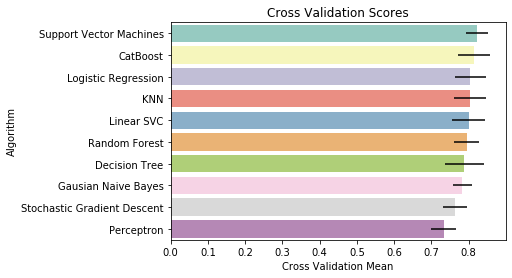

In [111]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

## 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [112]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.757, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.814, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.818, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.784, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.761, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.802, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.812, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.784, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.756, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.830, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.802, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.807, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.756, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.824, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.802, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.807, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.790, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.830, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   14.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [113]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [114]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [115]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

Our mean cross validation score improved slightly.

In [116]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
len(Y_pred)

418

# 7. Preparing data for submission

In [118]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [119]:
ss.shape

(418, 2)

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived. 

In [120]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [121]:
submit.shape

(418, 2)

Our dataframe is ready for submission!

In [122]:
# Create and save csv file 

submit.to_csv("C:/Users/Jason Chong/Documents/Kaggle/titanic/svm_titanic.csv", index = False)

# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion

You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)